In [1]:
import os,re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot

jtplot.style(theme='solarizedl', context='notebook', ticks=True, grid=False)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import substring as ss

In [21]:
jtplot.style()

['#3572C6',
 '#83a83b',
 '#c44e52',
 '#8172b2',
 '#ff914d',
 '#77BEDB',
 '#222222',
 '#4168B7',
 '#27ae60',
 '#e74c3c',
 '#bc89e0',
 '#ff711a',
 '#3498db',
 '#6C7A89']

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.float_format')
pd.reset_option('display.max_colwidth')

In [194]:
def msnvl(a):
    print(100*(a.isna().sum()/a.shape[0]))
def vc(a):
    print(a.value_counts())

In [195]:
i = 10
df = pd.read_csv(f"C:\\Users\\rvkmc\\OneDrive\\Documents\\caps1csv\\run_results{i}.csv")

In [196]:
df=pd.DataFrame()
df1=pd.DataFrame()
for f in range(5,61,5):
    if f>5:
        f
        df1 = pd.read_csv(f"C:\\Users\\rvkmc\\OneDrive\\Documents\\caps1csv\\run_results{f}.csv")
        df = pd.concat([df,df1],axis=0)
        print(df.shape)

10

(196, 14)


15

(392, 14)


20

(598, 14)


25

(795, 14)


30

(991, 14)


35

(1195, 14)


40

(1391, 14)


45

(1587, 14)


50

(1783, 14)


55

(1979, 14)


60

(2129, 14)


In [197]:
df.reset_index(inplace=True)

In [198]:
df

,index,selection1_name,selection1_price,selection1_sz,selection1_res,selection1_os,selection1_cpu,selection1_ram,selection1_gpu,selection1_strg,selection1_cnct,selection1_cam,selection1_clkspd,selection1_fp,selection1_selection2
0,0,Dell 15 3590 (C552511WIN9) (Intel Core i3 (8th...,"Rs. 39,000",15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",2.2GHz,No,NaN
1,1,Asus X509JA-EJ019T (Intel Core i3 (10th Gen) 4...,"Rs. 35,190",15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 2.0...,"Yes, VGA Webcam (without Privacy Shutter)",1.2GHz,Yes,NaN
2,2,Lenovo E15 (20RDS18B00) (Intel Core i5 (10th G...,"Rs. 59,490",15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.0\n1 USB 2.0...,"Yes, HD Webcam",1.6GHz,No,NaN
3,3,Lenovo (82FG00BQIN) (Intel Core i5 (11th Gen) ...,"Rs. 57,954",15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n1 USB Typ...,"Yes, HD Webcam",2.4GHz,NaN,NaN
4,4,Avita NS14A6INT441 (Intel Core i3 (8th Gen) 4G...,"Rs. 27,989",14 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,256 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 3.0...,"Yes, HD Webcam",2.1GHz,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,145,Dell 13 (Y560002IN9) (Intel Core i5 (5th Gen) ...,"Rs. 87,990",13.3 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (5th Gen),8 GB RAM,Intel HD 5500 Graphic Processor,256 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.0\n2 USB 3.0...,Yes,2.2GHz,No,NaN
2125,146,Acer Aspire E5-571 (i3 4th Gen/4GB/500GB/Win 8.1),"Rs. 35,799",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDR3,NaN,500GB\n7 / 10
2126,147,Dell Inspiron 5559(Y566513HIN9) (i7 6th Gen/16...,"Rs. 84,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,No,1TB\n9 / 10
2127,148,Dell Inspiron 11 3148 (i3 4th Gen/4GB/500GB/Wi...,"Rs. 46,360",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600MHz,NaN,500GB\n7 / 10


In [199]:
df = df.drop(columns=['index'])

In [200]:
df.isna().sum()

selection1_name             0
selection1_price           33
selection1_sz              66
selection1_res             66
selection1_os              66
selection1_cpu             66
selection1_ram             67
selection1_gpu             92
selection1_strg            66
selection1_cnct            66
selection1_cam             98
selection1_clkspd          59
selection1_fp             117
selection1_selection2    1261
dtype: int64

In [201]:
msnvl(df)

selection1_name           0.000000
selection1_price          1.550023
selection1_sz             3.100047
selection1_res            3.100047
selection1_os             3.100047
selection1_cpu            3.100047
selection1_ram            3.147017
selection1_gpu            4.321278
selection1_strg           3.100047
selection1_cnct           3.100047
selection1_cam            4.603100
selection1_clkspd         2.771254
selection1_fp             5.495538
selection1_selection2    59.229685
dtype: float64


In [202]:
df = df.iloc[:,:]

In [203]:
df['selection1_selection2'].value_counts()

4 GB             331
2 GB             292
6 GB             115
8 GB              72
1TB\n9 / 10       16
3 GB              14
500GB\n7 / 10      9
1                  6
1TB\n10 / 10       2
16 GB              2
128GB SSD          2
2TB\n10 / 10       2
500GB\n8 / 10      1
1GB                1
32GB SSD           1
256GB SSD          1
Up to 16GB         1
Name: selection1_selection2, dtype: int64

In [204]:
df[(df['selection1_selection2'].isna()==True)][['selection1_price','selection1_gpu']].value_counts()

selection1_price  selection1_gpu                     
Rs. 59,990        Intel UHD Graphic Processor            9
Rs. 41,990        AMD Radeon Vega 8 Graphic Processor    8
Rs. 37,490        Intel UHD Graphic Processor            7
Rs. 38,990        Intel UHD Graphic Processor            7
Rs. 57,990        Intel UHD Graphic Processor            7
                                                        ..
Rs. 52,500        Intel UHD Graphic Processor            1
Rs. 52,499        Intel HD 620 Graphic Processor         1
Rs. 52,489        Intel HD 615 Graphic Processor         1
Rs. 52,188        Intel HD 620 Graphic Processor         1
Rs. 1,00,990      Intel UHD Graphic Processor            1
Length: 1006, dtype: int64

In [205]:
df[df['selection1_selection2']=='128GB SSD']

,selection1_name,selection1_price,selection1_sz,selection1_res,selection1_os,selection1_cpu,selection1_ram,selection1_gpu,selection1_strg,selection1_cnct,selection1_cam,selection1_clkspd,selection1_fp,selection1_selection2
2113,Apple MacBook Pro 13-inch 2017 (i5 5th Gen/8GB...,"Rs. 94,410",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,No,128GB SSD
2115,Apple MacBook Air 13-inch 2017 (i5 5th Gen/8GB...,"Rs. 57,990",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,No,128GB SSD


In [206]:
df['selection1_selection2'].value_counts()

4 GB             331
2 GB             292
6 GB             115
8 GB              72
1TB\n9 / 10       16
3 GB              14
500GB\n7 / 10      9
1                  6
1TB\n10 / 10       2
16 GB              2
128GB SSD          2
2TB\n10 / 10       2
500GB\n8 / 10      1
1GB                1
32GB SSD           1
256GB SSD          1
Up to 16GB         1
Name: selection1_selection2, dtype: int64

In [207]:
ls = []
for i in df['selection1_selection2']:
    if i=='4 GB' or i=='3 GB' or i=='2 GB' or i=='1GB' or i=='6 GB' or i=='8 GB' or i=='16 GB':
        if i=='1GB':
            ls.append(1)
        else:
            ls.append(int(str(i).split()[0]))
    else:
        ls.append(0.128)

In [208]:
df['gprm'] = ls

In [209]:
df = df.drop(columns=['selection1_selection2'])

In [210]:
df

,selection1_name,selection1_price,selection1_sz,selection1_res,selection1_os,selection1_cpu,selection1_ram,selection1_gpu,selection1_strg,selection1_cnct,selection1_cam,selection1_clkspd,selection1_fp,gprm
0,Dell 15 3590 (C552511WIN9) (Intel Core i3 (8th...,"Rs. 39,000",15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",2.2GHz,No,0.128
1,Asus X509JA-EJ019T (Intel Core i3 (10th Gen) 4...,"Rs. 35,190",15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 2.0...,"Yes, VGA Webcam (without Privacy Shutter)",1.2GHz,Yes,0.128
2,Lenovo E15 (20RDS18B00) (Intel Core i5 (10th G...,"Rs. 59,490",15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.0\n1 USB 2.0...,"Yes, HD Webcam",1.6GHz,No,0.128
3,Lenovo (82FG00BQIN) (Intel Core i5 (11th Gen) ...,"Rs. 57,954",15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n1 USB Typ...,"Yes, HD Webcam",2.4GHz,NaN,0.128
4,Avita NS14A6INT441 (Intel Core i3 (8th Gen) 4G...,"Rs. 27,989",14 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,256 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 3.0...,"Yes, HD Webcam",2.1GHz,No,0.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,Dell 13 (Y560002IN9) (Intel Core i5 (5th Gen) ...,"Rs. 87,990",13.3 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (5th Gen),8 GB RAM,Intel HD 5500 Graphic Processor,256 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.0\n2 USB 3.0...,Yes,2.2GHz,No,0.128
2125,Acer Aspire E5-571 (i3 4th Gen/4GB/500GB/Win 8.1),"Rs. 35,799",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDR3,NaN,0.128
2126,Dell Inspiron 5559(Y566513HIN9) (i7 6th Gen/16...,"Rs. 84,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,No,0.128
2127,Dell Inspiron 11 3148 (i3 4th Gen/4GB/500GB/Wi...,"Rs. 46,360",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600MHz,NaN,0.128


In [211]:
df['selection1_fp'].value_counts()

No               1607
Yes               401
Yes, Touch ID       3
No6                 1
Name: selection1_fp, dtype: int64

In [212]:
ls = []
for i in df['selection1_fp']:
    if i=='No' or i=='No6':
        ls.append('No')
    elif i=='Yes' or i=='Yes, Touch ID':
        ls.append('Yes')
    else:
        ls.append('No')

In [213]:
df = df.drop(columns=['selection1_fp'])

In [214]:
df['fp'] = ls

In [215]:
df

,selection1_name,selection1_price,selection1_sz,selection1_res,selection1_os,selection1_cpu,selection1_ram,selection1_gpu,selection1_strg,selection1_cnct,selection1_cam,selection1_clkspd,gprm,fp
0,Dell 15 3590 (C552511WIN9) (Intel Core i3 (8th...,"Rs. 39,000",15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",2.2GHz,0.128,No
1,Asus X509JA-EJ019T (Intel Core i3 (10th Gen) 4...,"Rs. 35,190",15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 2.0...,"Yes, VGA Webcam (without Privacy Shutter)",1.2GHz,0.128,Yes
2,Lenovo E15 (20RDS18B00) (Intel Core i5 (10th G...,"Rs. 59,490",15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.0\n1 USB 2.0...,"Yes, HD Webcam",1.6GHz,0.128,No
3,Lenovo (82FG00BQIN) (Intel Core i5 (11th Gen) ...,"Rs. 57,954",15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n1 USB Typ...,"Yes, HD Webcam",2.4GHz,0.128,No
4,Avita NS14A6INT441 (Intel Core i3 (8th Gen) 4G...,"Rs. 27,989",14 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,256 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 3.0...,"Yes, HD Webcam",2.1GHz,0.128,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,Dell 13 (Y560002IN9) (Intel Core i5 (5th Gen) ...,"Rs. 87,990",13.3 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (5th Gen),8 GB RAM,Intel HD 5500 Graphic Processor,256 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.0\n2 USB 3.0...,Yes,2.2GHz,0.128,No
2125,Acer Aspire E5-571 (i3 4th Gen/4GB/500GB/Win 8.1),"Rs. 35,799",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDR3,0.128,No
2126,Dell Inspiron 5559(Y566513HIN9) (i7 6th Gen/16...,"Rs. 84,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.128,No
2127,Dell Inspiron 11 3148 (i3 4th Gen/4GB/500GB/Wi...,"Rs. 46,360",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600MHz,0.128,No


In [216]:
df = df.drop(columns=['selection1_name'])

In [217]:
df.columns = ['price','size','res','os',
     'cpu','ram','gpu','strg','cnct','cam',
              'clkspd','gprm','fp']

In [218]:
df = df.drop(columns=['clkspd'])

In [219]:
def mkint(col):
    return re.sub('Rs. |,','',col)

In [220]:
df = df.dropna()

In [221]:
df = df.reset_index()

In [222]:
df = df.drop(columns=['index'])

In [223]:
df['price'] = df['price'].apply(mkint)

In [224]:
df['price']=pd.to_numeric(df['price'])

In [225]:
df

,price,size,res,os,cpu,ram,gpu,strg,cnct,cam,gprm,fp
0,39000,15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",0.128,No
1,35190,15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 2.0...,"Yes, VGA Webcam (without Privacy Shutter)",0.128,Yes
2,59490,15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.0\n1 USB 2.0...,"Yes, HD Webcam",0.128,No
3,57954,15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n1 USB Typ...,"Yes, HD Webcam",0.128,No
4,27989,14 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,256 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 3.0...,"Yes, HD Webcam",0.128,No
...,...,...,...,...,...,...,...,...,...,...,...,...
2001,49990,15.6 Inches,1920 x 1080 Screen Resolution,Windows 8.1,Intel Core i5 (5th Gen),8 GB RAM,Nvidia GeForce 920M Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,Yes,4.000,No
2002,172290,13.3 Inches,Touchscreen,Windows 10,Intel Core i7 (8th Gen),16 GB RAM,Intel UHD 620 Graphic Processor,512 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n2 USB Typ...,"Yes, HD Webcam",0.128,Yes
2003,105050,14 Inches,Touchscreen,Windows 10,Intel Core i5 (8th Gen),8 GB RAM,Intel UHD 620 Graphic Processor,128 GB SSD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",0.128,No
2004,50199,15.6 Inches,1920 x 1080 Screen Resolution,Windows 10,Intel Core i7 (6th Gen),4 GB RAM,NVIDIA GeForce 940MX Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HP TrueVision HD Webcam",4.000,No


In [226]:
def rminc(col):
    return re.sub(' ','',re.sub('[a-zA-Z]','',col))

In [227]:
for i in df['size']:
    print(i)
    rminc(i)

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15 Inches


'15'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

13.5 Inches


'13.5'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

17.3 Inches


'17.3'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

10.5 Inches


'10.5'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

13.5 Inches


'13.5'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15 Inches


'15'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

12.3 Inches


'12.3'

13 Inches


'13'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

12.5 Inches


'12.5'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15. Inches


'15.'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

17 Inches


'17'

12.4 Inches


'12.4'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13 Inches


'13'

13.3 Inches


'13.3'

10.1 Inches


'10.1'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

11.6 Inches


'11.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

13 Inches


'13'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

16.1 Inches


'16.1'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

13.3 Inches


'13.3'

15 Inches


'15'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

13.3 Inches


'13.3'

10.1 Inches


'10.1'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

17.3 Inches


'17.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

17.3 Inches


'17.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14.5 Inches


'14.5'

14 Inches


'14'

17.3 Inches


'17.3'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

10.1 Inches


'10.1'

10.1 Inches


'10.1'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

14 Inches


'14'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

13.5 Inches


'13.5'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

13.6 Inches


'13.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

13 Inches


'13'

14 Inches


'14'

17 Inches


'17'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

17.3 Inches


'17.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

16.1 Inches


'16.1'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15 Inches


'15'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

17.3 Inches


'17.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

13 Inches


'13'

15.6 Inches


'15.6'

17 Inches


'17'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

12.3 Inches


'12.3'

13.4 Inches


'13.4'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.4 Inches


'13.4'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

12.3 Inches


'12.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

14 Inches


'14'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.5 Inches


'15.5'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

17.3 Inches


'17.3'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

12.3 Inches


'12.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

17 Inches


'17'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

12.3 Inches


'12.3'

12.3 Inches


'12.3'

17.3 Inches


'17.3'

17.3 Inches


'17.3'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15 Inches


'15'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

10.1 Inches


'10.1'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14.0 Inches


'14.0'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

12.2 Inches


'12.2'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

12.2 Inches


'12.2'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

17.3 Inches


'17.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

12.5 Inches


'12.5'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

11.6 Inches


'11.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

11.6 Inches


'11.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

11.6 Inches


'11.6'

15.6 Inches


'15.6'

11.6 Inches


'11.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

11.6 Inches


'11.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

11.6 Inches


'11.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

11.6 Inches


'11.6'

14 Inches


'14'

11.6 Inches


'11.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

16 Inches


'16'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

11.6 Inches


'11.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

17.3 Inches


'17.3'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14.0 Inches


'14.0'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13 Inches


'13'

15.6 Inches


'15.6'

13 Inches


'13'

12.3 Inches


'12.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14.1 Inches


'14.1'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

10 Inches


'10'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15 Inches


'15'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15. Inches


'15.'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.5 Inches


'13.5'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

16 Inches


'16'

14 Inches


'14'

15.6 Inches


'15.6'

15 Inches


'15'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

17.3 Inches


'17.3'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

13 Inches


'13'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14.1 Inches


'14.1'

14 Inches


'14'

15.6 Inches


'15.6'

13.5 Inches


'13.5'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15. Inches


'15.'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

17.3 Inches


'17.3'

17.3 Inches


'17.3'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

17.3 Inches


'17.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

17.3 Inches


'17.3'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15 Inches


'15'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

17.3 Inches


'17.3'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

16.1 Inches


'16.1'

15.6 Inches


'15.6'

14 Inches


'14'

12.3 Inches


'12.3'

16.1 Inches


'16.1'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

11.6 Inches


'11.6'

11.6 Inches


'11.6'

10.1 Inches


'10.1'

11.6 Inches


'11.6'

11.6 Inches


'11.6'

11.6 Inches


'11.6'

11.6 Inches


'11.6'

11.6 Inches


'11.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

13.5 Inches


'13.5'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

13.9 Inches


'13.9'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

11.6 Inches


'11.6'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

17.3 Inches


'17.3'

14 Inches


'14'

17.3 Inches


'17.3'

14 Inches


'14'

17.3 Inches


'17.3'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

11.6 Inches


'11.6'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

13.3 Inches


'13.3'

14 Inches


'14'

15.6 Inches


'15.6'

16.1 Inches


'16.1'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

16.1 Inches


'16.1'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

13 Inches


'13'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

15 Inches


'15'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

17.3 Inches


'17.3'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

14 Inches


'14'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

14 Inches


'14'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

12.3 Inches


'12.3'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

15.6 Inches


'15.6'

13.3 Inches


'13.3'

15.6 Inches


'15.6'

14 Inches


'14'

14 Inches


'14'

13.3 Inches


'13.3'

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [228]:
df['size'] = df['size'].apply(rminc)

In [229]:
df

,price,size,res,os,cpu,ram,gpu,strg,cnct,cam,gprm,fp
0,39000,15.6,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",0.128,No
1,35190,15.6,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 2.0...,"Yes, VGA Webcam (without Privacy Shutter)",0.128,Yes
2,59490,15.6,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.0\n1 USB 2.0...,"Yes, HD Webcam",0.128,No
3,57954,15.6,1920 x 1080 Screen Resolution,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n1 USB Typ...,"Yes, HD Webcam",0.128,No
4,27989,14,1920 x 1080 Screen Resolution,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,256 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 3.0...,"Yes, HD Webcam",0.128,No
...,...,...,...,...,...,...,...,...,...,...,...,...
2001,49990,15.6,1920 x 1080 Screen Resolution,Windows 8.1,Intel Core i5 (5th Gen),8 GB RAM,Nvidia GeForce 920M Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,Yes,4.000,No
2002,172290,13.3,Touchscreen,Windows 10,Intel Core i7 (8th Gen),16 GB RAM,Intel UHD 620 Graphic Processor,512 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n2 USB Typ...,"Yes, HD Webcam",0.128,Yes
2003,105050,14,Touchscreen,Windows 10,Intel Core i5 (8th Gen),8 GB RAM,Intel UHD 620 Graphic Processor,128 GB SSD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",0.128,No
2004,50199,15.6,1920 x 1080 Screen Resolution,Windows 10,Intel Core i7 (6th Gen),4 GB RAM,NVIDIA GeForce 940MX Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HP TrueVision HD Webcam",4.000,No


In [230]:
for i in df.columns:
    df[i].value_counts()

59990     26
74990     25
69990     17
49990     16
54990     16
          ..
86479      1
214287     1
158990     1
95500      1
55300      1
Name: price, Length: 1218, dtype: int64

15.6    1028
14       611
13.3     171
17.3      54
11.6      34
13        11
12.3      10
15        10
13.5      10
10.1       9
12.5       9
14.0       8
16.1       6
14.1       5
17         5
13.9       5
15.        3
15.4       2
16         2
12.2       2
13.4       2
14.5       1
10         1
10.5       1
15.5       1
12.0       1
15.2       1
12.4       1
12         1
13.6       1
Name: size, dtype: int64

1920 x 1080 Screen Resolution    1354
1366 x 768 Screen Resolution      316
Touchscreen                       256
3840 x 2160 Screen Resolution      35
2560 x 1600 Screen Resolution      26
3840 x 2400 Screen Resolution       3
2560 x 1440 Screen Resolution       3
3200 x 1800 Screen Resolution       2
1600 x 900 Screen Resolution        2
2880 x 1800 Screen Resolution       2
1400 x 900 Screen Resolution        1
2256 x 1504 Screen Resolution       1
1280 x 800 Screen Resolution        1
3070 x 1920 Screen Resolution       1
3000 x 2000 Screen Resolution       1
3072 x 1920 Screen Resolution       1
1922 x 1080 Screen Resolution       1
Name: res, dtype: int64

Windows 10                1783
DOS                        121
Google Chrome               50
macOS Mojave                10
Linux                       10
Windows 8.1                  9
macOS Catalina               9
Ubuntu                       5
macOS High Sierra            3
Windows 8                    3
macOS Sierra                 1
MAC OS X Mavericks           1
MAC OS X Mountain Lion       1
Name: os, dtype: int64

Intel Core i5 (8th Gen)          283
Intel Core i5 (10th Gen)         273
Intel Core i7 (10th Gen)         183
Intel Core i7 (8th Gen)          133
Intel Core i3 (10th Gen)         131
                                ... 
Intel Core M3 (6th Gen)            1
Qualcomm Snapdragon Octa-Core      1
Intel Core M                       1
Intel Core M3 (7th Gen)            1
Microsoft SQ1                      1
Name: cpu, Length: 62, dtype: int64

8 GB RAM     1059
4 GB RAM      551
16 GB RAM     326
32 GB RAM      38
2 GB RAM       21
12 GB RAM       5
24 GB RAM       3
64 GB RAM       2
3 GB RAM        1
Name: ram, dtype: int64

Intel UHD Graphic Processor                    344
Intel UHD 620 Graphic Processor                272
Intel HD 620 Graphic Processor                  98
AMD Radeon Vega 8 Graphic Processor             63
NVIDIA GeForce GTX 1650 Graphic Processor       56
                                              ... 
NVIDIA Geforce MX450 Graphic Processor           1
NVIDIA GeForce GTX 1650ti Graphic Processor      1
NVIDIA Geforce N16V-GMR1 Graphic Processor       1
AMD Radeon R5 M230 Graphic Processor             1
NVIDIA GeForce GT 920 Graphic Processor          1
Name: gpu, Length: 205, dtype: int64

1 TB HDD      914
512 GB SSD    512
256 GB SSD    231
1 TB SSD      167
500 GB HDD     43
128 GB SSD     38
32 GB SSD      34
2 TB HDD       26
64 GB SSD      19
16 GB SSD      13
2 TB SSD        6
1 GB HDD        2
512 SSD         1
Name: strg, dtype: int64

Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetooth 5.0\n1 USB Type C port                                     127
Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n1 USB Type C port                                                      102
Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetooth 4.2\n1 USB 2.0 slot                                         80
Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n2 USB Type C port                                                       63
Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetooth 4.2\n1 USB Type C port                                      58
                                                                                                           ... 
Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetooth 5.1\n2 USB Type C port                                       1
Wi-Fi 802.11 a/b/g/n\n2 USB 2.0 slots, 1 USB 3.0 slot                                                         1
Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetooth 5.1                                                    

Yes, HD Webcam                                       1454
Yes                                                    71
Yes, HP TrueVision HD Webcam                           45
Yes, HP Wide Vision HD Camera                          40
Yes, HP TrueVision HD Camera                           36
                                                     ... 
Yes, Windows Hello Sign Face Authentication Cam         1
Yes, HD IR Camera                                       1
Yes, HD Pop-Up Camera                                   1
Yes, HP Wide Vision HD Camera with Camera Shutter       1
Yes, Alienware HD Cam                                   1
Name: cam, Length: 68, dtype: int64

0.128     1218
4.000      324
2.000      287
6.000       97
8.000       64
3.000       14
16.000       2
Name: gprm, dtype: int64

No     1605
Yes     401
Name: fp, dtype: int64

In [231]:
lst = []
for i in df['res']:
    if i=='Touchscreen':
        lst.append(1)
    else:
        lst.append(0)

In [232]:
df['Touch_or_not'] = lst

In [233]:
def rminc(col):
    return re.sub(' ','',re.sub('[a-zA-W]','',col))

In [234]:
df['res'] = df['res'].apply(rminc)

In [235]:
df

,price,size,res,os,cpu,ram,gpu,strg,cnct,cam,gprm,fp,Touch_or_not
0,39000,15.6,19201080,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",0.128,No,0
1,35190,15.6,19201080,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 2.0...,"Yes, VGA Webcam (without Privacy Shutter)",0.128,Yes,0
2,59490,15.6,19201080,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.0\n1 USB 2.0...,"Yes, HD Webcam",0.128,No,0
3,57954,15.6,19201080,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n1 USB Typ...,"Yes, HD Webcam",0.128,No,0
4,27989,14,19201080,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,256 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 3.0...,"Yes, HD Webcam",0.128,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,49990,15.6,19201080,Windows 8.1,Intel Core i5 (5th Gen),8 GB RAM,Nvidia GeForce 920M Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,Yes,4.000,No,0
2002,172290,13.3,,Windows 10,Intel Core i7 (8th Gen),16 GB RAM,Intel UHD 620 Graphic Processor,512 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n2 USB Typ...,"Yes, HD Webcam",0.128,Yes,1
2003,105050,14,,Windows 10,Intel Core i5 (8th Gen),8 GB RAM,Intel UHD 620 Graphic Processor,128 GB SSD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",0.128,No,1
2004,50199,15.6,19201080,Windows 10,Intel Core i7 (6th Gen),4 GB RAM,NVIDIA GeForce 940MX Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HP TrueVision HD Webcam",4.000,No,0


In [236]:
wdth = []
hght = []
for c in df['res']:
    wdth.append(c[:4])
    hght.append(c[4:])

In [237]:
df['wid'] = wdth
df['hgt'] = hght

In [238]:
df.drop(columns=['res'],inplace=True)

In [239]:
def resl(a):
    if a=='':
        return 1920
    else:
        return a
def resl1(a):
    if a=='':
        return 1080
    else:
        return a

In [240]:
df['wid']=df['wid'].apply(resl)

In [241]:
df['hgt'] = df['hgt'].apply(resl1)

In [242]:
df['wid'] = df['wid'].astype(int)
df['hgt'] = df['hgt'].astype(int)
df['price'] = df['price'].astype(int)
df['size'] = df['size'].astype(float)

In [243]:
df=df.drop_duplicates()

In [244]:
df

,price,size,os,cpu,ram,gpu,strg,cnct,cam,gprm,fp,Touch_or_not,wid,hgt
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",0.128,No,0,1920,1080
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 2.0...,"Yes, VGA Webcam (without Privacy Shutter)",0.128,Yes,0,1920,1080
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.0\n1 USB 2.0...,"Yes, HD Webcam",0.128,No,0,1920,1080
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n1 USB Typ...,"Yes, HD Webcam",0.128,No,0,1920,1080
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,256 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 3.0...,"Yes, HD Webcam",0.128,No,0,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8 GB RAM,Nvidia GeForce 920M Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,Yes,4.000,No,0,1920,1080
2002,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16 GB RAM,Intel UHD 620 Graphic Processor,512 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n2 USB Typ...,"Yes, HD Webcam",0.128,Yes,1,1920,1080
2003,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8 GB RAM,Intel UHD 620 Graphic Processor,128 GB SSD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",0.128,No,1,1920,1080
2004,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4 GB RAM,NVIDIA GeForce 940MX Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HP TrueVision HD Webcam",4.000,No,0,1920,1080


In [245]:
df = df.reset_index()

In [246]:
df = df.iloc[:,1:]

In [247]:
df

,price,size,os,cpu,ram,gpu,strg,cnct,cam,gprm,fp,Touch_or_not,wid,hgt
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",0.128,No,0,1920,1080
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 2.0...,"Yes, VGA Webcam (without Privacy Shutter)",0.128,Yes,0,1920,1080
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.0\n1 USB 2.0...,"Yes, HD Webcam",0.128,No,0,1920,1080
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n1 USB Typ...,"Yes, HD Webcam",0.128,No,0,1920,1080
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,256 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 4.1\n2 USB 3.0...,"Yes, HD Webcam",0.128,No,0,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8 GB RAM,Nvidia GeForce 920M Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,Yes,4.000,No,0,1920,1080
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16 GB RAM,Intel UHD 620 Graphic Processor,512 GB SSD,Wi-Fi 802.11 a/b/g/n\nBluetooth 5.0\n2 USB Typ...,"Yes, HD Webcam",0.128,Yes,1,1920,1080
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8 GB RAM,Intel UHD 620 Graphic Processor,128 GB SSD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HD Webcam",0.128,No,1,1920,1080
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4 GB RAM,NVIDIA GeForce 940MX Graphic Processor,1 TB HDD,Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...,"Yes, HP TrueVision HD Webcam",4.000,No,0,1920,1080


In [248]:
df['price'].describe()

count      1988.000000
mean      76804.683602
std       52501.734339
min       11349.000000
25%       42615.000000
50%       62990.000000
75%       89922.500000
max      544494.000000
Name: price, dtype: float64

C:\Users\rvkmc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

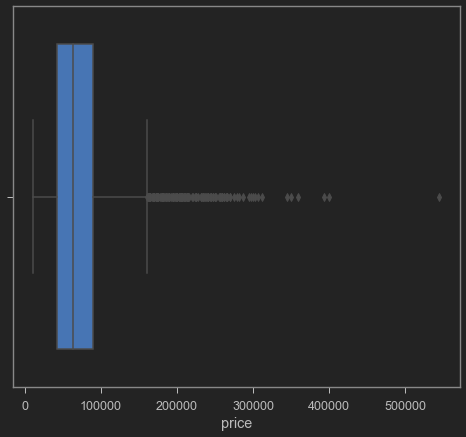

In [249]:
sns.boxplot(df['price'])

In [250]:
lst = []
for i in df['price']:
    if i<20000 and i>10000:
        lst.append('10k-20k')
    elif i<30000 and i>=20000:
        lst.append('20k-30k')
    elif i<40000 and i>=30000:
        lst.append('30k-40k')
    elif i<50000 and i>=40000:
        lst.append('40k-50k')
    elif i<60000 and i>=50000:
        lst.append('50k-60k')
    elif i<70000 and i>=60000:
        lst.append('60k-70k')
    elif i<80000 and i>=70000:
        lst.append('70k-80k')
    elif i<90000 and i>=80000:
        lst.append('80k-90k')
    elif i<100000 and i>=90000:
        lst.append('90k-100k')
    elif i<120000 and i>=100000:
        lst.append('100k-120k')
    elif i<140000 and i>=120000:
        lst.append('120k-140k')
    elif i<160000 and i>=140000:
        lst.append('140k-160k')
    elif i<180000 and i>=160000:
        lst.append('160k-180k')
    elif i<200000 and i>=180000:
        lst.append('180k-200k')
    elif i<250000 and i>=200000:
        lst.append('200k-250k')
    elif i<300000 and i>=250000:
        lst.append('250k-300k')
    elif i<350000 and i>=300000:
        lst.append('300k-350k')
    elif i<400000 and i>=350000:
        lst.append('350k-400k')
    elif i<450000 and i>=400000:
        lst.append('400k-450k')
    elif i<500000 and i>=450000:
        lst.append('450k-500k')
    elif i<550000 and i>=500000:
        lst.append('500k-550k')

In [251]:
lst = []
for i in df['price']:
    if i<20000 and i>10000:
        lst.append('1020')
    elif i<30000 and i>=20000:
        lst.append('2030')
    elif i<40000 and i>=30000:
        lst.append('3040')
    elif i<50000 and i>=40000:
        lst.append('4050')
    elif i<60000 and i>=50000:
        lst.append('5060')
    elif i<70000 and i>=60000:
        lst.append('6070')
    elif i<80000 and i>=70000:
        lst.append('7080')
    elif i<90000 and i>=80000:
        lst.append('8090')
    elif i<100000 and i>=90000:
        lst.append('90100')
    elif i<120000 and i>=100000:
        lst.append('100120')
    elif i<140000 and i>=120000:
        lst.append('120140')
    elif i<160000 and i>=140000:
        lst.append('140160')
    elif i<180000 and i>=160000:
        lst.append('160180')
    elif i<200000 and i>=180000:
        lst.append('180200')
    elif i<250000 and i>=200000:
        lst.append('200250')
    elif i<300000 and i>=250000:
        lst.append('250300')
    elif i<350000 and i>=300000:
        lst.append('300350')
    elif i<400000 and i>=350000:
        lst.append('350400')
    elif i<450000 and i>=400000:
        lst.append('400450')
    elif i<500000 and i>=450000:
        lst.append('450500')
    elif i<550000 and i>=500000:
        lst.append('500550')

In [252]:
df['price'].max()

544494

In [253]:
prcs = pd.DataFrame()

In [254]:
prcs['prcsnm'] = df['price']
prcs['prcsct'] = lst

In [255]:
prcs['prcsct'] = lst

In [256]:
prcs

,prcsnm,prcsct
0,39000,3040
1,35190,3040
2,59490,5060
3,57954,5060
4,27989,2030
...,...,...
1983,49990,4050
1984,172290,160180
1985,105050,100120
1986,50199,5060


In [257]:
df['lvl']=lst

In [258]:
def rmcnct(col):
    return re.sub('06','0 6',re.sub('h   1U','h    1U',re.sub('h 2','h    2',re.sub('1 a','1a',re.sub('i 8','i8',re.sub('1 E',' 1E',re.sub('/nB','/n B',re.sub('port','',re.sub('Port','',re.sub('\n','',col))))))))))

In [259]:
def rmcnct1(col):
    return re.sub('th2','th    2',re.sub('/n B','/n           B',re.sub(', ','',re.sub('3 U',' 3 U',re.sub('2 U',' 2 U',re.sub('1 U',' 1 U',re.sub('h ','h',col)))))))

In [260]:
def rmcnct2(col):
    return re.sub('04U','0 4U',re.sub('14U','1 4U',re.sub('24U','2 4U',re.sub('h 1U','h    1U',re.sub('s','',re.sub(' slots','',re.sub(' slot','',re.sub(' C','C',re.sub('B ','B',re.sub(' U','U',col))))))))))

In [261]:
df.iloc[1970,:]

price                                                       69990
size                                                         12.5
os                                                     Windows 10
cpu                                       Intel Core i7 (7th Gen)
ram                                                      8 GB RAM
gpu                       Intel HD Graphics 620 Graphic Processor
strg                                                   512 GB SSD
cnct            Wi-Fi 802.11 a/b/g/n\n1 Ethernet Port\nBluetoo...
cam                                                           Yes
gprm                                                        0.128
fp                                                             No
Touch_or_not                                                    0
wid                                                          1920
hgt                                                          1080
lvl                                                          6070
Name: 1970

In [262]:
a = (df['cnct'].apply(rmcnct1)).apply(rmcnct)

In [263]:
df['cnct'] = df['cnct'].apply(rmcnct)

In [264]:
df['cnct'] = df['cnct'].apply(rmcnct1)

In [265]:
df['cnct'] = df['cnct'].apply(rmcnct2)

In [266]:
df

,price,size,os,cpu,ram,gpu,strg,cnct,cam,gprm,fp,Touch_or_not,wid,hgt,lvl
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.1 1USB...,"Yes, HD Webcam",0.128,No,0,1920,1080,3040
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi802.11a/b/g/n Bluetooth4.1 2USB...,"Yes, VGA Webcam (without Privacy Shutter)",0.128,Yes,0,1920,1080,3040
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi802.11a/b/g/n Bluetooth4.0 1USB...,"Yes, HD Webcam",0.128,No,0,1920,1080,5060
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,1 TB HDD,Wi-Fi802.11a/b/g/n Bluetooth5.0 1USB...,"Yes, HD Webcam",0.128,No,0,1920,1080,5060
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,256 GB SSD,Wi-Fi802.11a/b/g/n Bluetooth4.1 2USB...,"Yes, HD Webcam",0.128,No,0,1920,1080,2030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8 GB RAM,Nvidia GeForce 920M Graphic Processor,1 TB HDD,Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.0 2USB...,Yes,4.000,No,0,1920,1080,4050
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16 GB RAM,Intel UHD 620 Graphic Processor,512 GB SSD,Wi-Fi802.11a/b/g/n Bluetooth5.0 2USB...,"Yes, HD Webcam",0.128,Yes,1,1920,1080,160180
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8 GB RAM,Intel UHD 620 Graphic Processor,128 GB SSD,Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.1 2USB3.0,"Yes, HD Webcam",0.128,No,1,1920,1080,100120
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4 GB RAM,NVIDIA GeForce 940MX Graphic Processor,1 TB HDD,Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.1 1USB...,"Yes, HP TrueVision HD Webcam",4.000,No,0,1920,1080,5060


In [267]:
wifi = []
for r in df['cnct'].value_counts().keys():
    wifi.append(r)

In [268]:
wifi

['Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth5.0 1USBTypeC ',
 'Wi-Fi802.11a/b/g/n           Bluetooth5.0 1USBTypeC ',
 'Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.2 1USB2.0',
 'Wi-Fi802.11a/b/g/n           Bluetooth5.0 2USBTypeC ',
 'Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.2 1USBTypeC ',
 'Wi-Fi802.11a/b/g/n           Bluetooth5.0 1USB2.0',
 'Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth5.0 1USB2.0 1USBTypeC ',
 'Wi-Fi802.11a/b/g/n           Bluetooth4.1 2USB3.0',
 'Wi-Fi802.11a/b/g/n           Bluetooth4.2 1USBTypeC ',
 'Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth5.0 1USB2.0',
 'Wi-Fi802.11a/b/g/n           Bluetooth5.0 2USB2.0 1USBTypeC ',
 'Wi-Fi802.11a/b/g/n           Bluetooth4.1 2USB3.0 1USBTypeC ',
 'Wi-Fi802.11a/b/g/n           Bluetooth4.0 2USB3.0',
 'Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.1 1USB2.0 2USB3.0',
 'Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.1 1USB2.0',
 'Wi-Fi802.11a/b/g/n           Bluetooth5.0 1USB2.0 1USBTypeC ',
 'Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.1 2USB3.0 1USBTypeC ',
 'Wi

In [269]:
modm = []
ethrnt = []
blth = []
usb2=[]
usb3=[]
usbc=[]
lcc = ['/n','et','2.0','3.0','peC']
for i in df['cnct']:
    spl = i.split()
    k=0
    for j in spl:
        if str(j).endswith('/n'):
            modm.append(1)
            k=1
    if k==0:
        modm.append(0)
    k=0
    for j in spl:
        if str(j).endswith('et'):
            ethrnt.append(j[0])
            k=1
    if k==0:
        ethrnt.append(0)
    k=0
    for j in spl:
        if str(j).endswith('B2.0'):
            usb2.append(j[0])
            k=1
    if k==0:
        usb2.append(0)
    k=0
    for j in spl:
        if str(j).endswith('B3.0'):
            usb3.append(j[0])
            k=1
    if k==0:
        usb3.append(0)
    k=0
    for j in spl:
        if str(j).endswith('peC'):
            k=1
            usbc.append(j[0])
    if k==0:
        usbc.append(0)
    k=0
    for j in spl:
        if str(j).startswith('B'):
            k=1
            blth.append(j[-3:])
    if k==0:
        blth.append(0)

In [270]:
len(modm)
for i in [modm,usb2,usb3,usbc,blth,ethrnt]:
    pd.DataFrame(i).value_counts()
    pd.DataFrame(i).shape

1988

1    1984
0       4
dtype: int64

(1988, 1)

0    1053
1     630
2     291
3      14
dtype: int64

(1988, 1)

0    1062
2     478
1     370
3      62
4      15
6       1
dtype: int64

(1988, 1)

0    921
1    906
2    150
4      8
3      3
dtype: int64

(1988, 1)

5.0    808
4.2    443
4.1    376
4.0    261
5.1     78
oth     14
0        8
dtype: int64

(1988, 1)

0    1091
1     897
dtype: int64

(1988, 1)

In [271]:
df['usb2'] = usb2
df['usb3'] = usb3
df['usbc'] = usbc
df['ethr'] = ethrnt
df['blth'] = blth
df['modm'] = modm

In [272]:
df

,price,size,os,cpu,ram,gpu,strg,cnct,cam,gprm,...,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.1 1USB...,"Yes, HD Webcam",0.128,...,0,1920,1080,3040,0,0,1,1,4.1,1
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi802.11a/b/g/n Bluetooth4.1 2USB...,"Yes, VGA Webcam (without Privacy Shutter)",0.128,...,0,1920,1080,3040,2,0,1,0,4.1,1
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,1 TB HDD,Wi-Fi802.11a/b/g/n Bluetooth4.0 1USB...,"Yes, HD Webcam",0.128,...,0,1920,1080,5060,1,3,0,0,4.0,1
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,1 TB HDD,Wi-Fi802.11a/b/g/n Bluetooth5.0 1USB...,"Yes, HD Webcam",0.128,...,0,1920,1080,5060,0,0,1,0,5.0,1
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,256 GB SSD,Wi-Fi802.11a/b/g/n Bluetooth4.1 2USB...,"Yes, HD Webcam",0.128,...,0,1920,1080,2030,0,2,1,0,4.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8 GB RAM,Nvidia GeForce 920M Graphic Processor,1 TB HDD,Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.0 2USB...,Yes,4.000,...,0,1920,1080,4050,2,1,0,1,4.0,1
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16 GB RAM,Intel UHD 620 Graphic Processor,512 GB SSD,Wi-Fi802.11a/b/g/n Bluetooth5.0 2USB...,"Yes, HD Webcam",0.128,...,1,1920,1080,160180,0,0,2,0,5.0,1
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8 GB RAM,Intel UHD 620 Graphic Processor,128 GB SSD,Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.1 2USB3.0,"Yes, HD Webcam",0.128,...,1,1920,1080,100120,0,2,0,1,4.1,1
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4 GB RAM,NVIDIA GeForce 940MX Graphic Processor,1 TB HDD,Wi-Fi802.11a/b/g/n 1Ethernet Bluetooth4.1 1USB...,"Yes, HP TrueVision HD Webcam",4.000,...,0,1920,1080,5060,1,2,0,1,4.1,1


In [273]:
for i in df['lvl'].value_counts().keys():
    df[df['lvl']==i]['blth'].value_counts()

5.0    93
4.2    64
4.1    59
4.0    38
5.1     5
0       2
Name: blth, dtype: int64

4.2    80
4.1    66
5.0    55
4.0    51
oth     3
0       2
Name: blth, dtype: int64

4.2    78
5.0    68
4.1    57
4.0    37
5.1     4
oth     2
Name: blth, dtype: int64

5.0    106
4.2     53
4.1     35
4.0     17
5.1     10
0        2
oth      1
Name: blth, dtype: int64

5.0    115
4.2     36
4.1     29
4.0     22
5.1      7
oth      1
Name: blth, dtype: int64

4.2    49
4.1    48
4.0    40
5.0    11
oth     5
Name: blth, dtype: int64

5.0    67
4.1    22
4.2    21
4.0    10
5.1     9
Name: blth, dtype: int64

5.0    70
4.2    11
4.0     8
4.1     8
5.1     3
Name: blth, dtype: int64

5.0    50
4.2    22
4.1    11
4.0     9
5.1     5
oth     1
Name: blth, dtype: int64

5.0    55
4.1    12
4.2     8
5.1     8
4.0     5
oth     1
Name: blth, dtype: int64

5.0    29
5.1     8
4.2     6
4.1     4
4.0     2
0       1
Name: blth, dtype: int64

5.0    24
5.1     7
4.1     6
4.2     4
4.0     2
0       1
Name: blth, dtype: int64

5.0    28
4.1     5
4.2     3
5.1     3
4.0     2
Name: blth, dtype: int64

5.0    17
4.1     4
5.1     4
4.0     2
4.2     1
Name: blth, dtype: int64

4.0    14
4.1     7
4.2     3
Name: blth, dtype: int64

5.0    12
5.1     4
4.1     3
4.2     3
4.0     2
Name: blth, dtype: int64

5.0    4
4.2    1
5.1    1
Name: blth, dtype: int64

5.0    3
Name: blth, dtype: int64

5.0    1
Name: blth, dtype: int64

In [274]:
c=0
lsbl=[]
for i in df['blth']:
    if i=='oth':
        a = df['lvl'][c]
        if a=='Normal':
            print(a)
            lsbl.append('4.2')
        else:
            lsbl.append('5.0')
        c+=1
    else:
        lsbl.append(i)
        c+=1

In [275]:
pd.DataFrame(lsbl).value_counts()

5.0    822
4.2    443
4.1    376
4.0    261
5.1     78
0        8
dtype: int64

In [276]:
df['blth'].value_counts()

5.0    808
4.2    443
4.1    376
4.0    261
5.1     78
oth     14
0        8
Name: blth, dtype: int64

In [277]:
df['blth'] = lsbl

In [278]:
df['usb2']

0       0
1       2
2       1
3       0
4       0
       ..
1983    2
1984    0
1985    0
1986    1
1987    0
Name: usb2, Length: 1988, dtype: object

In [279]:
df = df.drop(columns=['cnct'])

In [280]:
df

,price,size,os,cpu,ram,gpu,strg,cam,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,"Yes, HD Webcam",0.128,No,0,1920,1080,3040,0,0,1,1,4.1,1
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,"Yes, VGA Webcam (without Privacy Shutter)",0.128,Yes,0,1920,1080,3040,2,0,1,0,4.1,1
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,1 TB HDD,"Yes, HD Webcam",0.128,No,0,1920,1080,5060,1,3,0,0,4.0,1
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,1 TB HDD,"Yes, HD Webcam",0.128,No,0,1920,1080,5060,0,0,1,0,5.0,1
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,256 GB SSD,"Yes, HD Webcam",0.128,No,0,1920,1080,2030,0,2,1,0,4.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8 GB RAM,Nvidia GeForce 920M Graphic Processor,1 TB HDD,Yes,4.000,No,0,1920,1080,4050,2,1,0,1,4.0,1
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16 GB RAM,Intel UHD 620 Graphic Processor,512 GB SSD,"Yes, HD Webcam",0.128,Yes,1,1920,1080,160180,0,0,2,0,5.0,1
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8 GB RAM,Intel UHD 620 Graphic Processor,128 GB SSD,"Yes, HD Webcam",0.128,No,1,1920,1080,100120,0,2,0,1,4.1,1
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4 GB RAM,NVIDIA GeForce 940MX Graphic Processor,1 TB HDD,"Yes, HP TrueVision HD Webcam",4.000,No,0,1920,1080,5060,1,2,0,1,4.1,1


In [281]:
for i in df['lvl'].value_counts().keys():
    df[df['lvl']==i]['strg'].value_counts()

1 TB HDD      128
512 GB SSD     79
256 GB SSD     29
2 TB HDD        6
16 GB SSD       6
500 GB HDD      4
32 GB SSD       4
128 GB SSD      4
1 TB SSD        1
Name: strg, dtype: int64

1 TB HDD      197
256 GB SSD     38
512 GB SSD     13
500 GB HDD      4
32 GB SSD       2
64 GB SSD       1
1 GB HDD        1
2 TB HDD        1
Name: strg, dtype: int64

1 TB HDD      146
256 GB SSD     40
512 GB SSD     39
500 GB HDD      6
128 GB SSD      5
16 GB SSD       3
32 GB SSD       2
64 GB SSD       2
2 TB HDD        2
1 GB HDD        1
Name: strg, dtype: int64

1 TB HDD      97
512 GB SSD    72
256 GB SSD    26
500 GB HDD     8
2 TB HDD       6
128 GB SSD     5
1 TB SSD       4
32 GB SSD      3
16 GB SSD      2
64 GB SSD      1
Name: strg, dtype: int64

512 GB SSD    86
1 TB HDD      76
256 GB SSD    23
128 GB SSD     9
1 TB SSD       5
500 GB HDD     4
32 GB SSD      3
64 GB SSD      2
512 SSD        1
2 TB HDD       1
Name: strg, dtype: int64

1 TB HDD      108
500 GB HDD     12
256 GB SSD     10
64 GB SSD       9
128 GB SSD      6
32 GB SSD       5
16 GB SSD       2
2 TB HDD        1
Name: strg, dtype: int64

512 GB SSD    56
1 TB HDD      45
256 GB SSD    10
1 TB SSD       6
2 TB HDD       4
128 GB SSD     4
64 GB SSD      3
32 GB SSD      1
Name: strg, dtype: int64

512 GB SSD    38
1 TB HDD      24
1 TB SSD      22
256 GB SSD    13
128 GB SSD     2
2 TB HDD       1
Name: strg, dtype: int64

512 GB SSD    40
1 TB HDD      35
256 GB SSD    12
1 TB SSD       6
128 GB SSD     2
32 GB SSD      1
64 GB SSD      1
2 TB HDD       1
Name: strg, dtype: int64

512 GB SSD    31
1 TB SSD      29
1 TB HDD      16
256 GB SSD    12
2 TB HDD       1
Name: strg, dtype: int64

1 TB SSD      28
512 GB SSD    13
1 TB HDD       6
256 GB SSD     2
2 TB SSD       1
Name: strg, dtype: int64

512 GB SSD    16
1 TB SSD      15
1 TB HDD       6
256 GB SSD     5
2 TB SSD       2
Name: strg, dtype: int64

1 TB SSD      19
512 GB SSD    11
1 TB HDD       8
256 GB SSD     3
Name: strg, dtype: int64

1 TB SSD      12
512 GB SSD    10
1 TB HDD       4
256 GB SSD     1
2 TB HDD       1
Name: strg, dtype: int64

32 GB SSD     12
1 TB HDD       7
500 GB HDD     5
Name: strg, dtype: int64

1 TB SSD      14
256 GB SSD     3
1 TB HDD       3
512 GB SSD     2
2 TB SSD       2
Name: strg, dtype: int64

1 TB SSD    3
1 TB HDD    2
2 TB SSD    1
Name: strg, dtype: int64

1 TB HDD      2
256 GB SSD    1
Name: strg, dtype: int64

512 GB SSD    1
Name: strg, dtype: int64

In [282]:
stamls = []
for i in df['strg']:
    a = i.split()[0]
    if len(a)<2:
        stamls.append(int(a)*1024)
    else:
        stamls.append(a)

In [283]:
stls = []
for i in df['strg']:
    if i.endswith('SD'):
        stls.append(2)
    else:
        stls.append(1)

In [284]:
df['strtype'] = stls
df['amst'] = stamls

In [285]:
df

,price,size,os,cpu,ram,gpu,strg,cam,gprm,fp,...,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,"Yes, HD Webcam",0.128,No,...,1080,3040,0,0,1,1,4.1,1,1,1024
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,1 TB HDD,"Yes, VGA Webcam (without Privacy Shutter)",0.128,Yes,...,1080,3040,2,0,1,0,4.1,1,1,1024
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,1 TB HDD,"Yes, HD Webcam",0.128,No,...,1080,5060,1,3,0,0,4.0,1,1,1024
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,1 TB HDD,"Yes, HD Webcam",0.128,No,...,1080,5060,0,0,1,0,5.0,1,1,1024
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,256 GB SSD,"Yes, HD Webcam",0.128,No,...,1080,2030,0,2,1,0,4.1,1,2,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8 GB RAM,Nvidia GeForce 920M Graphic Processor,1 TB HDD,Yes,4.000,No,...,1080,4050,2,1,0,1,4.0,1,1,1024
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16 GB RAM,Intel UHD 620 Graphic Processor,512 GB SSD,"Yes, HD Webcam",0.128,Yes,...,1080,160180,0,0,2,0,5.0,1,2,512
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8 GB RAM,Intel UHD 620 Graphic Processor,128 GB SSD,"Yes, HD Webcam",0.128,No,...,1080,100120,0,2,0,1,4.1,1,2,128
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4 GB RAM,NVIDIA GeForce 940MX Graphic Processor,1 TB HDD,"Yes, HP TrueVision HD Webcam",4.000,No,...,1080,5060,1,2,0,1,4.1,1,1,1024


In [286]:
df['ethr'] = df['ethr'].astype(object)

In [287]:
df.drop(columns=['strg'])

,price,size,os,cpu,ram,gpu,cam,gprm,fp,Touch_or_not,...,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,"Yes, HD Webcam",0.128,No,0,...,1080,3040,0,0,1,1,4.1,1,1,1024
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4 GB RAM,Intel UHD Graphic Processor,"Yes, VGA Webcam (without Privacy Shutter)",0.128,Yes,0,...,1080,3040,2,0,1,0,4.1,1,1,1024
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8 GB RAM,Intel UHD Graphic Processor,"Yes, HD Webcam",0.128,No,0,...,1080,5060,1,3,0,0,4.0,1,1,1024
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8 GB RAM,Intel Iris Xe Graphic Processor,"Yes, HD Webcam",0.128,No,0,...,1080,5060,0,0,1,0,5.0,1,1,1024
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4 GB RAM,Intel UHD 620 Graphic Processor,"Yes, HD Webcam",0.128,No,0,...,1080,2030,0,2,1,0,4.1,1,2,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8 GB RAM,Nvidia GeForce 920M Graphic Processor,Yes,4.000,No,0,...,1080,4050,2,1,0,1,4.0,1,1,1024
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16 GB RAM,Intel UHD 620 Graphic Processor,"Yes, HD Webcam",0.128,Yes,1,...,1080,160180,0,0,2,0,5.0,1,2,512
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8 GB RAM,Intel UHD 620 Graphic Processor,"Yes, HD Webcam",0.128,No,1,...,1080,100120,0,2,0,1,4.1,1,2,128
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4 GB RAM,NVIDIA GeForce 940MX Graphic Processor,"Yes, HP TrueVision HD Webcam",4.000,No,0,...,1080,5060,1,2,0,1,4.1,1,1,1024


In [288]:
df['ram'].value_counts()

8 GB RAM     1048
4 GB RAM      546
16 GB RAM     325
32 GB RAM      38
2 GB RAM       21
12 GB RAM       5
64 GB RAM       2
24 GB RAM       2
3 GB RAM        1
Name: ram, dtype: int64

In [289]:
rmls = []
for i in df['ram']:
    rmls.append(i.split()[0])

In [290]:
df['ram']=rmls

In [291]:
df

,price,size,os,cpu,ram,gpu,strg,cam,gprm,fp,...,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4,Intel UHD Graphic Processor,1 TB HDD,"Yes, HD Webcam",0.128,No,...,1080,3040,0,0,1,1,4.1,1,1,1024
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4,Intel UHD Graphic Processor,1 TB HDD,"Yes, VGA Webcam (without Privacy Shutter)",0.128,Yes,...,1080,3040,2,0,1,0,4.1,1,1,1024
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8,Intel UHD Graphic Processor,1 TB HDD,"Yes, HD Webcam",0.128,No,...,1080,5060,1,3,0,0,4.0,1,1,1024
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8,Intel Iris Xe Graphic Processor,1 TB HDD,"Yes, HD Webcam",0.128,No,...,1080,5060,0,0,1,0,5.0,1,1,1024
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4,Intel UHD 620 Graphic Processor,256 GB SSD,"Yes, HD Webcam",0.128,No,...,1080,2030,0,2,1,0,4.1,1,2,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8,Nvidia GeForce 920M Graphic Processor,1 TB HDD,Yes,4.000,No,...,1080,4050,2,1,0,1,4.0,1,1,1024
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16,Intel UHD 620 Graphic Processor,512 GB SSD,"Yes, HD Webcam",0.128,Yes,...,1080,160180,0,0,2,0,5.0,1,2,512
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8,Intel UHD 620 Graphic Processor,128 GB SSD,"Yes, HD Webcam",0.128,No,...,1080,100120,0,2,0,1,4.1,1,2,128
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4,NVIDIA GeForce 940MX Graphic Processor,1 TB HDD,"Yes, HP TrueVision HD Webcam",4.000,No,...,1080,5060,1,2,0,1,4.1,1,1,1024


In [292]:
df = df.drop(columns=['strg'])

In [293]:
df

,price,size,os,cpu,ram,gpu,cam,gprm,fp,Touch_or_not,...,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4,Intel UHD Graphic Processor,"Yes, HD Webcam",0.128,No,0,...,1080,3040,0,0,1,1,4.1,1,1,1024
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4,Intel UHD Graphic Processor,"Yes, VGA Webcam (without Privacy Shutter)",0.128,Yes,0,...,1080,3040,2,0,1,0,4.1,1,1,1024
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8,Intel UHD Graphic Processor,"Yes, HD Webcam",0.128,No,0,...,1080,5060,1,3,0,0,4.0,1,1,1024
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8,Intel Iris Xe Graphic Processor,"Yes, HD Webcam",0.128,No,0,...,1080,5060,0,0,1,0,5.0,1,1,1024
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4,Intel UHD 620 Graphic Processor,"Yes, HD Webcam",0.128,No,0,...,1080,2030,0,2,1,0,4.1,1,2,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8,Nvidia GeForce 920M Graphic Processor,Yes,4.000,No,0,...,1080,4050,2,1,0,1,4.0,1,1,1024
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16,Intel UHD 620 Graphic Processor,"Yes, HD Webcam",0.128,Yes,1,...,1080,160180,0,0,2,0,5.0,1,2,512
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8,Intel UHD 620 Graphic Processor,"Yes, HD Webcam",0.128,No,1,...,1080,100120,0,2,0,1,4.1,1,2,128
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4,NVIDIA GeForce 940MX Graphic Processor,"Yes, HP TrueVision HD Webcam",4.000,No,0,...,1080,5060,1,2,0,1,4.1,1,1,1024


In [294]:
df['cam'].value_counts()

Yes, HD Webcam                                       1439
Yes                                                    71
Yes, HP TrueVision HD Webcam                           45
Yes, HP Wide Vision HD Camera                          40
Yes, HP TrueVision HD Camera                           35
                                                     ... 
Yes, Windows Hello Sign Face Authentication Cam         1
Yes, HD IR Camera                                       1
Yes, HD Pop-Up Camera                                   1
Yes, HP Wide Vision HD Camera with Camera Shutter       1
Yes, Alienware HD Cam                                   1
Name: cam, Length: 68, dtype: int64

In [295]:
for i in df['cam'].value_counts().keys():
    str(i).split()[0]

'Yes,'

'Yes'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

'Yes,'

In [296]:
df = df.drop(columns=['cam'])

In [297]:
df

,price,size,os,cpu,ram,gpu,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4,Intel UHD Graphic Processor,0.128,No,0,1920,1080,3040,0,0,1,1,4.1,1,1,1024
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4,Intel UHD Graphic Processor,0.128,Yes,0,1920,1080,3040,2,0,1,0,4.1,1,1,1024
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8,Intel UHD Graphic Processor,0.128,No,0,1920,1080,5060,1,3,0,0,4.0,1,1,1024
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8,Intel Iris Xe Graphic Processor,0.128,No,0,1920,1080,5060,0,0,1,0,5.0,1,1,1024
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4,Intel UHD 620 Graphic Processor,0.128,No,0,1920,1080,2030,0,2,1,0,4.1,1,2,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8,Nvidia GeForce 920M Graphic Processor,4.000,No,0,1920,1080,4050,2,1,0,1,4.0,1,1,1024
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16,Intel UHD 620 Graphic Processor,0.128,Yes,1,1920,1080,160180,0,0,2,0,5.0,1,2,512
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8,Intel UHD 620 Graphic Processor,0.128,No,1,1920,1080,100120,0,2,0,1,4.1,1,2,128
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4,NVIDIA GeForce 940MX Graphic Processor,4.000,No,0,1920,1080,5060,1,2,0,1,4.1,1,1,1024


In [298]:
df['gpu'].value_counts()

Intel UHD Graphic Processor                    339
Intel UHD 620 Graphic Processor                271
Intel HD 620 Graphic Processor                  98
AMD Radeon Vega 8 Graphic Processor             60
NVIDIA GeForce GTX 1650 Graphic Processor       55
                                              ... 
NVIDIA Geforce MX450 Graphic Processor           1
NVIDIA GeForce GTX 1650ti Graphic Processor      1
NVIDIA Geforce N16V-GMR1 Graphic Processor       1
AMD Radeon R5 M230 Graphic Processor             1
NVIDIA GeForce GT 920 Graphic Processor          1
Name: gpu, Length: 205, dtype: int64

In [299]:
df['cpu'].value_counts()

Intel Core i5 (8th Gen)          281
Intel Core i5 (10th Gen)         271
Intel Core i7 (10th Gen)         182
Intel Core i7 (8th Gen)          133
Intel Core i3 (10th Gen)         129
                                ... 
Intel Core M3 (6th Gen)            1
Qualcomm Snapdragon Octa-Core      1
Intel Core M                       1
Intel Core M3 (7th Gen)            1
Microsoft SQ1                      1
Name: cpu, Length: 62, dtype: int64

In [300]:
df['os'].value_counts()

Windows 10                1769
DOS                        120
Google Chrome               49
Linux                       10
Windows 8.1                  9
macOS Catalina               9
macOS Mojave                 8
Ubuntu                       5
macOS High Sierra            3
Windows 8                    3
macOS Sierra                 1
MAC OS X Mavericks           1
MAC OS X Mountain Lion       1
Name: os, dtype: int64

In [301]:
df['ram'].value_counts()

8     1048
4      546
16     325
32      38
2       21
12       5
24       2
64       2
3        1
Name: ram, dtype: int64

In [302]:
l = ['wid','hgt','ram','size']
for c in l:
    c
    if c == 'size':
        df[c] = df[c].astype(float)
    else:
        df[c] = df[c].astype(int)

'wid'

'hgt'

'ram'

'size'

In [303]:
df

,price,size,os,cpu,ram,gpu,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4,Intel UHD Graphic Processor,0.128,No,0,1920,1080,3040,0,0,1,1,4.1,1,1,1024
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4,Intel UHD Graphic Processor,0.128,Yes,0,1920,1080,3040,2,0,1,0,4.1,1,1,1024
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8,Intel UHD Graphic Processor,0.128,No,0,1920,1080,5060,1,3,0,0,4.0,1,1,1024
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8,Intel Iris Xe Graphic Processor,0.128,No,0,1920,1080,5060,0,0,1,0,5.0,1,1,1024
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4,Intel UHD 620 Graphic Processor,0.128,No,0,1920,1080,2030,0,2,1,0,4.1,1,2,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8,Nvidia GeForce 920M Graphic Processor,4.000,No,0,1920,1080,4050,2,1,0,1,4.0,1,1,1024
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16,Intel UHD 620 Graphic Processor,0.128,Yes,1,1920,1080,160180,0,0,2,0,5.0,1,2,512
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8,Intel UHD 620 Graphic Processor,0.128,No,1,1920,1080,100120,0,2,0,1,4.1,1,2,128
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4,NVIDIA GeForce 940MX Graphic Processor,4.000,No,0,1920,1080,5060,1,2,0,1,4.1,1,1,1024


In [304]:
#df = df.drop(columns=['price'])

In [305]:
def lwr(x):
    return str(x).lower().split()[0]

In [306]:
a = df['gpu'].apply(lwr)

In [307]:
a

0        intel
1        intel
2        intel
3        intel
4        intel
         ...  
1983    nvidia
1984     intel
1985     intel
1986    nvidia
1987     intel
Name: gpu, Length: 1988, dtype: object

In [308]:
pd.DataFrame(a).value_counts()

gpu      
intel        985
nvidia       718
amd          273
arm            3
radeon         2
mediatek       2
ati            2
qualcomm       1
microsoft      1
hd             1
dtype: int64

In [309]:
df['gpumnf'] = a

In [310]:
df = df.drop(columns=['gpu'])

In [311]:
for m in ['qualcomm','microsoft','hd','ati']:
    df[df['gpumnf']==m]

,price,size,os,cpu,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst,gpumnf
1586,70830,13.3,Windows 10,Qualcomm Snapdragon Octa-Core,8,0.128,Yes,1,1920,1080,7080,0,0,1,0,5.0,1,2,256,qualcomm


,price,size,os,cpu,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst,gpumnf
403,89088,13.0,Windows 10,Microsoft SQ1,8,0.128,No,1,1920,1080,8090,0,0,2,0,5.0,1,2,128,microsoft


,price,size,os,cpu,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst,gpumnf
1756,26990,15.2,Windows 8.1,Intel Core M,4,0.128,No,1,1920,1080,2030,1,1,0,0,4.0,1,2,128,hd


,price,size,os,cpu,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst,gpumnf
1736,36500,15.6,DOS,Intel Core i3 (4th Gen),4,2.0,No,0,1366,768,3040,2,1,0,0,4.0,1,1,1024,ati
1888,48890,15.6,Windows 10,AMD Quad-Core A10 APU,8,2.0,No,0,1920,1080,4050,1,2,0,0,4.0,1,1,1024,ati


In [312]:
df['price'] = df['price'].astype(int)

In [313]:
df[df['gpumnf']=='arm']

,price,size,os,cpu,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst,gpumnf
1287,27999,10.1,Google Chrome,MediaTek Octa-core,4,0.128,No,1,1920,1080,2030,0,0,2,0,4.2,1,2,128,arm
1289,20514,11.6,Google Chrome,MediaTek Octa-core,4,0.128,No,1,1920,1080,2030,1,0,1,0,4.2,1,2,32,arm
1292,22069,11.6,Google Chrome,MediaTek Octa-core,4,0.128,No,1,1920,1080,2030,1,0,1,0,4.2,1,2,32,arm


In [314]:
gpumnf = df['gpumnf']

In [315]:
df = df.drop(columns=['gpumnf'])

In [316]:
#i = 100
#if i not in [11,12,100]:
 #   print('no')

In [317]:
#mls = []
#for i in df['gpumnf']:
 #   if i not in ['intel','nvidia','arm','amd','mediatek']:
  #      mls.append(len(i)/10)
   # else:
    #    a = df[df['gpumnf']==i]['gpumnf'].value_counts()[0]
     #   mls.append(a)

In [318]:
#mls

In [319]:
#df['gpumnf'] = mls

In [320]:
df

,price,size,os,cpu,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4,0.128,No,0,1920,1080,3040,0,0,1,1,4.1,1,1,1024
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4,0.128,Yes,0,1920,1080,3040,2,0,1,0,4.1,1,1,1024
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8,0.128,No,0,1920,1080,5060,1,3,0,0,4.0,1,1,1024
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8,0.128,No,0,1920,1080,5060,0,0,1,0,5.0,1,1,1024
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4,0.128,No,0,1920,1080,2030,0,2,1,0,4.1,1,2,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8,4.000,No,0,1920,1080,4050,2,1,0,1,4.0,1,1,1024
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16,0.128,Yes,1,1920,1080,160180,0,0,2,0,5.0,1,2,512
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8,0.128,No,1,1920,1080,100120,0,2,0,1,4.1,1,2,128
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4,4.000,No,0,1920,1080,5060,1,2,0,1,4.1,1,1,1024


In [321]:
#def gprm(col):
 #   return re.sub('intel ','intel',re.sub('so ','so',re.sub('on ','on',re.sub('rx ','',re.sub('  ',' ',re.sub('geforce','',re.sub('graphics','',re.sub('grphics','',re.sub(' ti','ti',re.sub('graphic processor','',re.sub('radeon','amd radeon',re.sub('amd radeon','radeon',re.sub('Radeon','AMD Radeon',re.sub('tx ','tx',col))))))))))))))

In [322]:
#gp = []
#for i in df['gpu'].value_counts().keys():
 #   gp.append((str(i).lower()))

In [323]:
#gp = pd.DataFrame(gp)

In [324]:
#gp[0] = gp[0].apply(gprm)

In [325]:
#gp = []
#for i in df['gpu']:
 #   gp.append((str(i).lower()))

In [326]:
#gp = pd.DataFrame(gp)
#gp[0] = gp[0].apply(gprm)

In [327]:
#df['gpu'] = gp[0]

In [328]:
df

,price,size,os,cpu,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4,0.128,No,0,1920,1080,3040,0,0,1,1,4.1,1,1,1024
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4,0.128,Yes,0,1920,1080,3040,2,0,1,0,4.1,1,1,1024
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8,0.128,No,0,1920,1080,5060,1,3,0,0,4.0,1,1,1024
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8,0.128,No,0,1920,1080,5060,0,0,1,0,5.0,1,1,1024
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4,0.128,No,0,1920,1080,2030,0,2,1,0,4.1,1,2,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8,4.000,No,0,1920,1080,4050,2,1,0,1,4.0,1,1,1024
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16,0.128,Yes,1,1920,1080,160180,0,0,2,0,5.0,1,2,512
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8,0.128,No,1,1920,1080,100120,0,2,0,1,4.1,1,2,128
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4,4.000,No,0,1920,1080,5060,1,2,0,1,4.1,1,1,1024


In [329]:
#a = df['gpu']

In [330]:
#lst = ['intel','nvidia','arm','amd','mediatek','qualcomm','microsoft','hd','ati']

In [331]:
#for i in lst:
    #print(i,'mean',df[df['gpu'].str.startswith(i)]['price'].mean())
   # print(i,'mode',df[df['gpu'].str.startswith(i)]['price'].mode())
  #  print(i,'max',df[df['gpu'].str.startswith(i)]['price'].max())
   # print(i,'median',df[df['gpu'].str.startswith(i)]['price'].median())
    #print(i,'min',df[df['gpu'].str.startswith(i)]['price'].min())

In [332]:
'1=>gp(ati,hd,mdtk,arm),2=>lght(qulcm,msft,intl),3=>hvy(nvdia,amd)'

'1=>gp(ati,hd,mdtk,arm),2=>lght(qulcm,msft,intl),3=>hvy(nvdia,amd)'

In [333]:
#gpuvar = []
#for i in a:
  #  if i.startswith('intel')==True or i.startswith('microsoft')==True or i.startswith('qualcomm')==True:
      #  gpuvar.append(2)
 #   elif i.startswith('ati')==True or i.startswith('hd')==True or i.startswith('mediatek')==True or i.startswith('arm')==True:
    #    gpuvar.append(1)
  #  else:
       # gpuvar.append(3)

In [334]:
#df['gpuvar'] = gpuvar

In [335]:
#df[['gpuvar','gpu']]

In [336]:
#df['gpu'][167] = 'nvidia gtx1650'

In [337]:
#lst

In [338]:
#var = []
#for i in df[df['gpu'].str.startswith('microsoft')]['gpu'].value_counts().keys():
   # var.append(i.split(maxsplit=1))

In [339]:
#var = pd.DataFrame(var)

In [340]:
#var

In [341]:
#df[df['gpu'].str.startswith('microsoft')]

In [342]:
#pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.min_rows', 100)
#pd.set_option('display.expand_frame_repr', True)

In [343]:
#for i in var[1]:
#    i

In [344]:
df

,price,size,os,cpu,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst
0,39000,15.6,Windows 10,Intel Core i3 (10th Gen),4,0.128,No,0,1920,1080,3040,0,0,1,1,4.1,1,1,1024
1,35190,15.6,Windows 10,Intel Core i3 (10th Gen),4,0.128,Yes,0,1920,1080,3040,2,0,1,0,4.1,1,1,1024
2,59490,15.6,Windows 10,Intel Core i5 (10th Gen),8,0.128,No,0,1920,1080,5060,1,3,0,0,4.0,1,1,1024
3,57954,15.6,Windows 10,Intel Core i5 (11th Gen),8,0.128,No,0,1920,1080,5060,0,0,1,0,5.0,1,1,1024
4,27989,14.0,Windows 10,Intel Core i3 (8th Gen),4,0.128,No,0,1920,1080,2030,0,2,1,0,4.1,1,2,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,Intel Core i5 (5th Gen),8,4.000,No,0,1920,1080,4050,2,1,0,1,4.0,1,1,1024
1984,172290,13.3,Windows 10,Intel Core i7 (8th Gen),16,0.128,Yes,1,1920,1080,160180,0,0,2,0,5.0,1,2,512
1985,105050,14.0,Windows 10,Intel Core i5 (8th Gen),8,0.128,No,1,1920,1080,100120,0,2,0,1,4.1,1,2,128
1986,50199,15.6,Windows 10,Intel Core i7 (6th Gen),4,4.000,No,0,1920,1080,5060,1,2,0,1,4.1,1,1,1024


In [345]:
cpls = []
for i in df['cpu']:
    cpls.append(str(str(i).lower()).split()[0])

In [346]:
cpls = pd.DataFrame(cpls).value_counts

In [347]:
cpls()

intel        1694
amd           287
mediatek        5
qualcomm        1
microsoft       1
dtype: int64

In [348]:
cpmnf = []
for i in df['cpu']:
    cpmnf.append(str(str(i).lower()).split()[0])

In [349]:
df['cpumnf'] = cpmnf

In [350]:
for m in ['mediatek','qualcomm','microsoft']:
    df[df['cpumnf']==m]

,price,size,os,cpu,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst,cpumnf
1285,27175,11.6,Google Chrome,MediaTek Octa-core,4,0.128,No,1,1920,1080,2030,1,0,1,0,4.2,1,2,32,mediatek
1286,18852,11.6,Google Chrome,MediaTek Octa-core,4,0.128,No,0,1366,768,1020,1,0,1,0,4.2,1,2,32,mediatek
1287,27999,10.1,Google Chrome,MediaTek Octa-core,4,0.128,No,1,1920,1080,2030,0,0,2,0,4.2,1,2,128,mediatek
1289,20514,11.6,Google Chrome,MediaTek Octa-core,4,0.128,No,1,1920,1080,2030,1,0,1,0,4.2,1,2,32,mediatek
1292,22069,11.6,Google Chrome,MediaTek Octa-core,4,0.128,No,1,1920,1080,2030,1,0,1,0,4.2,1,2,32,mediatek


,price,size,os,cpu,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst,cpumnf
1586,70830,13.3,Windows 10,Qualcomm Snapdragon Octa-Core,8,0.128,Yes,1,1920,1080,7080,0,0,1,0,5.0,1,2,256,qualcomm


,price,size,os,cpu,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,amst,cpumnf
403,89088,13.0,Windows 10,Microsoft SQ1,8,0.128,No,1,1920,1080,8090,0,0,2,0,5.0,1,2,128,microsoft


In [351]:
df['cpumnf'] = cpls

In [352]:
df.drop(columns=['cpvr'],inplace=bool(1))

KeyError: "['cpvr'] not found in axis"

In [353]:
itl = []
amd  = []
ots = []
for i in df['cpu'].value_counts().keys():
    if i.lower().split()[0]=='intel':
        itl.append(i)
    elif i.lower().split()[0]=='amd':
        amd.append(i)
    else:
        ots.append(i)

In [354]:
ncrs = []
thrds=[]
bc = []
mcl = []
pnm = []
for i in df['cpu']:
    if i=='Intel Core i5 (8th Gen)':
        ncrs.append(4)
        thrds.append(8)
        bc.append(1.6)
        mcl.append(4.1)
        pnm.append(14)
    elif i=='Intel Core i5 (10th Gen)':
        ncrs.append(4)
        thrds.append(8)
        bc.append(2.4)
        mcl.append(4.5)
        pnm.append(14)
    elif i=='Intel Core i7 (10th Gen)':
        ncrs.append(8)
        thrds.append(16)
        bc.append(2.2)
        mcl.append(5)
        pnm.append(14)
    elif i=='Intel Core i7 (8th Gen)':
        ncrs.append(6)
        thrds.append(12)
        bc.append(2.2)
        mcl.append(4.1)
        pnm.append(14)
    elif i=='Intel Core i3 (10th Gen)':
        ncrs.append(4)
        thrds.append(8)
        bc.append(3)
        mcl.append(4)
        pnm.append(14)
    elif i=='Intel Core i3 (8th Gen)':
        ncrs.append(4)
        thrds.append(4)
        bc.append(2.1)
        mcl.append(3.9)
        pnm.append(14)
    elif i=='Intel Core i3 (7th Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(3.6)
        mcl.append(3.6)
        pnm.append(14)
    elif i=='Intel Core i5 (11th Gen)':
        ncrs.append(6)
        thrds.append(12)
        bc.append(3.9)
        mcl.append(4.9)
        pnm.append(14)
    elif i=='Intel Core i7 (9th Gen)':
        ncrs.append(6)
        thrds.append(12)
        bc.append(2.7)
        mcl.append(4.4)
        pnm.append(14)
    elif i=='Intel Core i5 (7th Gen)':
        ncrs.append(4)
        thrds.append(4)
        bc.append(3.8)
        mcl.append(4.2)
        pnm.append(14)
    elif i=='Intel Core i7 (7th Gen)':
        ncrs.append(4)
        thrds.append(8)
        bc.append(4.3)
        mcl.append(4.6)
        pnm.append(14)
    elif i=='Intel Core i3 (6th Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(3.9)
        mcl.append(3.9)
        pnm.append(14)
    elif i=='Intel Core i7 (11th Gen)':
        ncrs.append(8)
        thrds.append(16)
        bc.append(3.6)
        mcl.append(5)
        pnm.append(14)
    elif i=='Intel Pentium Quad-Core':
        ncrs.append(4)
        thrds.append(4)
        bc.append(1.5)
        mcl.append(2.4)
        pnm.append(14)
    elif i=='Intel Atom Quad-Core':
        ncrs.append(4)
        thrds.append(4)
        bc.append(1.9)
        mcl.append(1.9)
        pnm.append(22)
    elif i=='Intel Core i5 (6th Gen)':
        ncrs.append(4)
        thrds.append(4)
        bc.append(3.5)
        mcl.append(3.9)
        pnm.append(14)
    elif i=='Intel Pentium Dual-Core':
        ncrs.append(2)
        thrds.append(4)
        bc.append(3.7)
        mcl.append(3.7)
        pnm.append(14)
    elif i=='Intel Core i5 (5th Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(2.7)
        mcl.append(3.1)
        pnm.append(14)
    elif i=='Intel Pentium Gold':
        ncrs.append(2)
        thrds.append(4)
        bc.append(4.3)
        mcl.append(4.3)
        pnm.append(14)
    elif i=='Intel Core i7 (6th Gen)':
        ncrs.append(8)
        thrds.append(16)
        bc.append(3.2)
        mcl.append(3.7)
        pnm.append(14)
    elif i=='Intel Core i9 (10th Gen)':
        ncrs.append(10)
        thrds.append(20)
        bc.append(3.6)
        mcl.append(4.2)
        pnm.append(14)
    elif i=='Intel Core i9 (9th Gen)':
        ncrs.append(8)
        thrds.append(16)
        bc.append(3.1)
        mcl.append(5)
        pnm.append(14)
    elif i=='Intel Core i3 (5th Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(3.2)
        mcl.append(3.2)
        pnm.append(32)
    elif i=='Intel Core i9 (8th Gen)':
        ncrs.append(6)
        thrds.append(12)
        bc.append(2.9)
        mcl.append(4.7)
        pnm.append(14)
    elif i=='Intel Core i7 (4th Gen)':
        ncrs.append(4)
        thrds.append(8)
        bc.append(2.5)
        mcl.append(3.7)
        pnm.append(22)
    elif i=='Intel Core i3 (4th Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(2)
        mcl.append(2)
        pnm.append(22)
    elif i=='Intel Core i5 (1st Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(3.2)
        mcl.append(3.4)
        pnm.append(32)
    elif i=='Intel Core i5 (4th Gen)':
        ncrs.append(4)
        thrds.append(4)
        bc.append(2.7)
        mcl.append(3.2)
        pnm.append(22)
    elif i=='Intel Celeron Quad-Core':
        ncrs.append(4)
        thrds.append(4)
        bc.append(1.8)
        mcl.append(2)
        pnm.append(22)
    elif i=='Intel Core i5 (3rd Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(2.7)
        mcl.append(3.4)
        pnm.append(22)
    elif i=='Intel Core M3 (6th Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(1.5)
        mcl.append(1.5)
        pnm.append(10)
    elif i=='Intel Core i7 (5th Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(3.1)
        mcl.append(4)
        pnm.append(14)
    elif i=='Intel Core M3 (8th Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(1.5)
        mcl.append(1.5)
        pnm.append(10)
    elif i=='Intel Core M5 (6th Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(1)
        mcl.append(2.7)
        pnm.append(14)
    elif i=='Intel Core M':
        ncrs.append(2)
        thrds.append(4)
        bc.append(1)
        mcl.append(2.7)
        pnm.append(14)
    elif i=='Intel Core M3 (7th Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(1)
        mcl.append(2.7)
        pnm.append(14)
    elif i=='Intel Core M3 (7th Gen)':
        ncrs.append(2)
        thrds.append(4)
        bc.append(1)
        mcl.append(2.7)
        pnm.append(14)
    elif i=='AMD Quad-Core Ryzen 5':
        ncrs.append(4)
        thrds.append(8)
        bc.append(3.7)
        mcl.append(4.2)
        pnm.append(12)
    elif i=='AMD Dual-Core Ryzen 3':
        ncrs.append(2)
        thrds.append(4)
        bc.append(2.6)
        mcl.append(3.5)
        pnm.append(12)
    elif i=='AMD Hexa-Core Ryzen 5':
        ncrs.append(6)
        thrds.append(12)
        bc.append(3.7)
        mcl.append(4.2)
        pnm.append(7)
    elif i=='AMD Octa-Core Ryzen 7':
        ncrs.append(8)
        thrds.append(16)
        bc.append(3.1)
        mcl.append(4.3)
        pnm.append(7)
    elif i=='AMD Quad-Core Ryzen 7':
        ncrs.append(4)
        thrds.append(8)
        bc.append(2.3)
        mcl.append(4)
        pnm.append(12)
    elif i=='AMD Dual-Core A6 APU' or i=='AMD Dual-Core APU':
        ncrs.append(2)
        thrds.append(2)
        bc.append(1.8)
        mcl.append(2.9)
        pnm.append(28)
    elif i=='AMD Dual-Core Athlon':
        ncrs.append(2)
        thrds.append(4)
        bc.append(3.5)
        mcl.append(3.5)
        pnm.append(14)
    elif i=='AMD Dual-Core A4 APU':
        ncrs.append(2)
        thrds.append(2)
        bc.append(2)
        mcl.append(2.6)
        pnm.append(32)
    elif i=='AMD Dual-Core A9 APU':
        ncrs.append(2)
        thrds.append(2)
        bc.append(3)
        mcl.append(3.6)
        pnm.append(28)
    elif i=='AMD Quad-Core Ryzen 3':
        ncrs.append(4)
        thrds.append(8)
        bc.append(3.8)
        mcl.append(4)
        pnm.append(12)
    elif i=='AMD Dual-Core APU':
        ncrs.append(2)
        thrds.append(2)
        bc.append(1.8)
        mcl.append(2.9)
        pnm.append(28)
    elif i=='AMD Hexa-Core Ryzen 7':
        ncrs.append(8)
        thrds.append(16)
        bc.append(3.2)
        mcl.append(4.4)
        pnm.append(7)
    elif i=='AMD Octa-Core Ryzen 9':
        ncrs.append(8)
        thrds.append(16)
        bc.append(3)
        mcl.append(4.8)
        pnm.append(7)
    elif i=='AMD Quad-Core A10 APU' or i=='AMD Quad-Core APU':
        ncrs.append(4)
        thrds.append(4)
        bc.append(3.5)
        mcl.append(3.8)
        pnm.append(28)
    elif i=='AMD Quad-Core A12 APU':
        ncrs.append(4)
        thrds.append(4)
        bc.append(3.1)
        mcl.append(3.8)
        pnm.append(28)
    elif i=='AMD Quad-Core E2 APU':
        ncrs.append(2)
        thrds.append(2)
        bc.append(1.6)
        mcl.append(2.4)
        pnm.append(40)
    elif i=='AMD Quad-Core E1 APU':
        ncrs.append(2)
        thrds.append(2)
        bc.append(1.4)
        mcl.append(2.0)
        pnm.append(40)
    elif i=='AMD Quad-Core A4 APU':
        ncrs.append(4)
        thrds.append(4)
        bc.append(1.5)
        mcl.append(2.6)
        pnm.append(32)
    elif i=='AMD Quad-Core A8 APU':
        ncrs.append(4)
        thrds.append(4)
        bc.append(3.5)
        mcl.append(3.8)
        pnm.append(28)
    elif i=='MediaTek Octa-core':
        ncrs.append(8)
        thrds.append(8)
        bc.append(1.0)
        mcl.append(1.5)
        pnm.append(28)
    elif i=='Microsoft SQ1':
        ncrs.append(8)
        thrds.append(8)
        bc.append(1.8)
        mcl.append(3)
        pnm.append(7)
    else:
        ncrs.append(8)
        thrds.append(8)
        bc.append(1.9)
        mcl.append(2.8)
        pnm.append(10)

In [355]:
amd

['AMD Quad-Core Ryzen 5',
 'AMD Dual-Core Ryzen 3',
 'AMD Hexa-Core Ryzen 5',
 'AMD Octa-Core Ryzen 7',
 'AMD Quad-Core Ryzen 7',
 'AMD Dual-Core A6 APU',
 'AMD Dual-Core Athlon',
 'AMD Dual-Core A4 APU',
 'AMD Dual-Core A9 APU',
 'AMD Dual-Core APU',
 'AMD Quad-Core Ryzen 3',
 'AMD Quad-Core E2 APU',
 'AMD Hexa-Core Ryzen 7',
 'AMD Quad-Core A12 APU',
 'AMD Octa-Core Ryzen 9',
 'AMD Quad-Core A10 APU',
 'AMD Quad-Core A8 APU',
 'AMD Dual-Core E1 APU',
 'AMD Quad-Core A4 APU',
 'AMD Quad-Core APU']

In [356]:
itl

['Intel Core i5 (8th Gen)',
 'Intel Core i5 (10th Gen)',
 'Intel Core i7 (10th Gen)',
 'Intel Core i7 (8th Gen)',
 'Intel Core i3 (10th Gen)',
 'Intel Core i3 (7th Gen)',
 'Intel Core i5 (11th Gen)',
 'Intel Core i3 (8th Gen)',
 'Intel Core i7 (9th Gen)',
 'Intel Core i5 (7th Gen)',
 'Intel Celeron Dual-Core',
 'Intel Core i5 (9th Gen)',
 'Intel Core i7 (7th Gen)',
 'Intel Core i3 (6th Gen)',
 'Intel Core i7 (11th Gen)',
 'Intel Pentium Quad-Core',
 'Intel Core i3 (11th Gen)',
 'Intel Atom Quad-Core',
 'Intel Core i5 (6th Gen)',
 'Intel Pentium Dual-Core',
 'Intel Core i5 (5th Gen)',
 'Intel Core i9 (10th Gen)',
 'Intel Core i7 (6th Gen)',
 'Intel Pentium Gold',
 'Intel Core i9 (9th Gen)',
 'Intel Core i3 (5th Gen)',
 'Intel Core i9 (8th Gen)',
 'Intel Core i7 (4th Gen)',
 'Intel Core i5 (4th Gen)',
 'Intel Core i3 (4th Gen)',
 'Intel Core i5 (3rd Gen)',
 'Intel Celeron Quad-Core',
 'Intel Core i5 (1st Gen)',
 'Intel Core M3 (8th Gen)',
 'Intel Core i7 (5th Gen)',
 'Intel Core M5 (6th 

In [357]:
ots

['MediaTek Octa-core', 'Qualcomm Snapdragon Octa-Core', 'Microsoft SQ1']

In [358]:
df['ncrs'] = ncrs
df['thrds'] = thrds
df['bc'] = bc
df['mcl'] = mcl
df['pnm'] = pnm

In [359]:
df[df['cpu']=='Qualcomm Snapdragon Octa-Core']

,price,size,os,cpu,ram,gprm,fp,Touch_or_not,wid,hgt,...,blth,modm,strtype,amst,cpumnf,ncrs,thrds,bc,mcl,pnm
1586,70830,13.3,Windows 10,Qualcomm Snapdragon Octa-Core,8,0.128,Yes,1,1920,1080,...,5.0,1,2,256,<bound method DataFrame.value_counts of ...,8,8,1.9,2.8,10


In [360]:
df = df.drop(columns=['cpu'])

In [361]:
df

,price,size,os,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,...,blth,modm,strtype,amst,cpumnf,ncrs,thrds,bc,mcl,pnm
0,39000,15.6,Windows 10,4,0.128,No,0,1920,1080,3040,...,4.1,1,1,1024,<bound method DataFrame.value_counts of ...,4,8,3.0,4.0,14
1,35190,15.6,Windows 10,4,0.128,Yes,0,1920,1080,3040,...,4.1,1,1,1024,<bound method DataFrame.value_counts of ...,4,8,3.0,4.0,14
2,59490,15.6,Windows 10,8,0.128,No,0,1920,1080,5060,...,4.0,1,1,1024,<bound method DataFrame.value_counts of ...,4,8,2.4,4.5,14
3,57954,15.6,Windows 10,8,0.128,No,0,1920,1080,5060,...,5.0,1,1,1024,<bound method DataFrame.value_counts of ...,6,12,3.9,4.9,14
4,27989,14.0,Windows 10,4,0.128,No,0,1920,1080,2030,...,4.1,1,2,256,<bound method DataFrame.value_counts of ...,4,4,2.1,3.9,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,Windows 8.1,8,4.000,No,0,1920,1080,4050,...,4.0,1,1,1024,<bound method DataFrame.value_counts of ...,2,4,2.7,3.1,14
1984,172290,13.3,Windows 10,16,0.128,Yes,1,1920,1080,160180,...,5.0,1,2,512,<bound method DataFrame.value_counts of ...,6,12,2.2,4.1,14
1985,105050,14.0,Windows 10,8,0.128,No,1,1920,1080,100120,...,4.1,1,2,128,<bound method DataFrame.value_counts of ...,4,8,1.6,4.1,14
1986,50199,15.6,Windows 10,4,4.000,No,0,1920,1080,5060,...,4.1,1,1,1024,<bound method DataFrame.value_counts of ...,8,16,3.2,3.7,14


In [362]:
df = df.drop(columns=['cpumnf'])

In [363]:
def mksm(x):
    return re.sub('macos','mac',str(x).lower().split()[0])

In [364]:
df['os']  = df['os'].apply(mksm)

In [365]:
df['os'].value_counts()

windows    1781
dos         120
google       49
mac          23
linux        10
ubuntu        5
Name: os, dtype: int64

In [366]:
df['fp'] = df['fp'].map({'Yes':'1','No':'0'})

In [367]:
af = df

In [189]:
df = pd.read_csv('df.csv')

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1988 non-null   object 
 1   size          1988 non-null   float64
 2   os            1988 non-null   int64  
 3   ram           1988 non-null   int32  
 4   gprm          1988 non-null   float64
 5   fp            1988 non-null   object 
 6   Touch_or_not  1988 non-null   int64  
 7   wid           1988 non-null   int32  
 8   hgt           1988 non-null   int32  
 9   lvl           1988 non-null   object 
 10  usb2          1988 non-null   object 
 11  usb3          1988 non-null   object 
 12  usbc          1988 non-null   object 
 13  ethr          1988 non-null   object 
 14  blth          1988 non-null   object 
 15  modm          1988 non-null   int64  
 16  strtype       1988 non-null   int64  
 17  amst          1988 non-null   object 
 18  ncrs          1988 non-null 

In [395]:
df['bc']

0       3.0
1       3.0
2       2.4
3       3.9
4       2.1
       ... 
1983    2.7
1984    2.2
1985    1.6
1986    3.2
1987    2.7
Name: bc, Length: 1988, dtype: float64

In [369]:
a = df['os'].value_counts().to_dict()
df['os'] = df['os'].map(a)

In [370]:
df['os'].value_counts()

1781    1781
120      120
49        49
23        23
10        10
5          5
Name: os, dtype: int64

In [371]:
df['lvl'].value_counts()

5060      261
3040      257
4050      246
6070      224
7080      210
2030      153
8090      129
100120    100
90100      98
120140     89
200250     50
140160     44
160180     41
180200     28
1020       24
250300     24
300350      6
350400      3
500550      1
Name: lvl, dtype: int64

In [391]:
df.iloc[:,1].astype(float)

0       15.6
1       15.6
2       15.6
3       15.6
4       14.0
        ... 
1983    15.6
1984    13.3
1985    14.0
1986    15.6
1987    13.3
Name: size, Length: 1988, dtype: float64

In [455]:
df['price'] = df['price'].astype(int)

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1988 non-null   int32  
 1   size          1988 non-null   float64
 2   os            1988 non-null   int64  
 3   ram           1988 non-null   int32  
 4   gprm          1988 non-null   float64
 5   fp            1988 non-null   object 
 6   Touch_or_not  1988 non-null   int64  
 7   wid           1988 non-null   int32  
 8   hgt           1988 non-null   int32  
 9   lvl           1988 non-null   object 
 10  usb2          1988 non-null   object 
 11  usb3          1988 non-null   object 
 12  usbc          1988 non-null   object 
 13  ethr          1988 non-null   object 
 14  blth          1988 non-null   object 
 15  modm          1988 non-null   int64  
 16  strtype       1988 non-null   int64  
 17  amst          1988 non-null   object 
 18  ncrs          1988 non-null 

In [545]:
for i in df.columns:
    if i in list(range(0,23)):
        if i not in [0,1,3,4,7,8,17,20,21]:
            df.iloc[:,i] = df.iloc[:,i].astype(str)

In [546]:
j=0
jl = []
for i in df.columns:
    if j not in [0,1,3,4,7,8,17,20,21]:
        jl.append(j)
    j+=1 

In [459]:
df.iloc[:,jl]

,os,fp,Touch_or_not,lvl,usb2,usb3,usbc,ethr,blth,modm,strtype,ncrs,thrds,pnm
0,1781,0,0,3040,0,0,1,1,4.1,1,1,4,8,14
1,1781,1,0,3040,2,0,1,0,4.1,1,1,4,8,14
2,1781,0,0,5060,1,3,0,0,4.0,1,1,4,8,14
3,1781,0,0,5060,0,0,1,0,5.0,1,1,6,12,14
4,1781,0,0,2030,0,2,1,0,4.1,1,2,4,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,1781,0,0,4050,2,1,0,1,4.0,1,1,2,4,14
1984,1781,1,1,160180,0,0,2,0,5.0,1,2,6,12,14
1985,1781,0,1,100120,0,2,0,1,4.1,1,2,4,8,14
1986,1781,0,0,5060,1,2,0,1,4.1,1,1,8,16,14


In [7]:
df.to_csv('df.csv')

In [2]:
df = pd.read_csv('df.csv')

In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df

,price,size,os,ram,gprm,fp,Touch_or_not,wid,hgt,lvl,...,ethr,blth,modm,strtype,amst,ncrs,thrds,bc,mcl,pnm
0,39000,15.6,1781,4,0.128,0,0,1920,1080,3040,...,1,4.1,1,1,1024,4,8,3.0,4.0,14
1,35190,15.6,1781,4,0.128,1,0,1920,1080,3040,...,0,4.1,1,1,1024,4,8,3.0,4.0,14
2,59490,15.6,1781,8,0.128,0,0,1920,1080,5060,...,0,4.0,1,1,1024,4,8,2.4,4.5,14
3,57954,15.6,1781,8,0.128,0,0,1920,1080,5060,...,0,5.0,1,1,1024,6,12,3.9,4.9,14
4,27989,14.0,1781,4,0.128,0,0,1920,1080,2030,...,0,4.1,1,2,256,4,4,2.1,3.9,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,49990,15.6,1781,8,4.000,0,0,1920,1080,4050,...,1,4.0,1,1,1024,2,4,2.7,3.1,14
1984,172290,13.3,1781,16,0.128,1,1,1920,1080,160180,...,0,5.0,1,2,512,6,12,2.2,4.1,14
1985,105050,14.0,1781,8,0.128,0,1,1920,1080,100120,...,1,4.1,1,2,128,4,8,1.6,4.1,14
1986,50199,15.6,1781,4,4.000,0,0,1920,1080,5060,...,1,4.1,1,1,1024,8,16,3.2,3.7,14


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df['lvl'].value_counts().keys()

Int64Index([  5060,   3040,   4050,   6070,   7080,   2030,   8090, 100120,
             90100, 120140, 200250, 140160, 160180, 180200, 250300,   1020,
            300350, 350400, 500550],
           dtype='int64')

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'PRICE RANGES')

Text(0.5, 0, 'DIFFERENT PRICE RANGES')

Text(0, 0.5, 'NUMBER OF LAPTOPS')

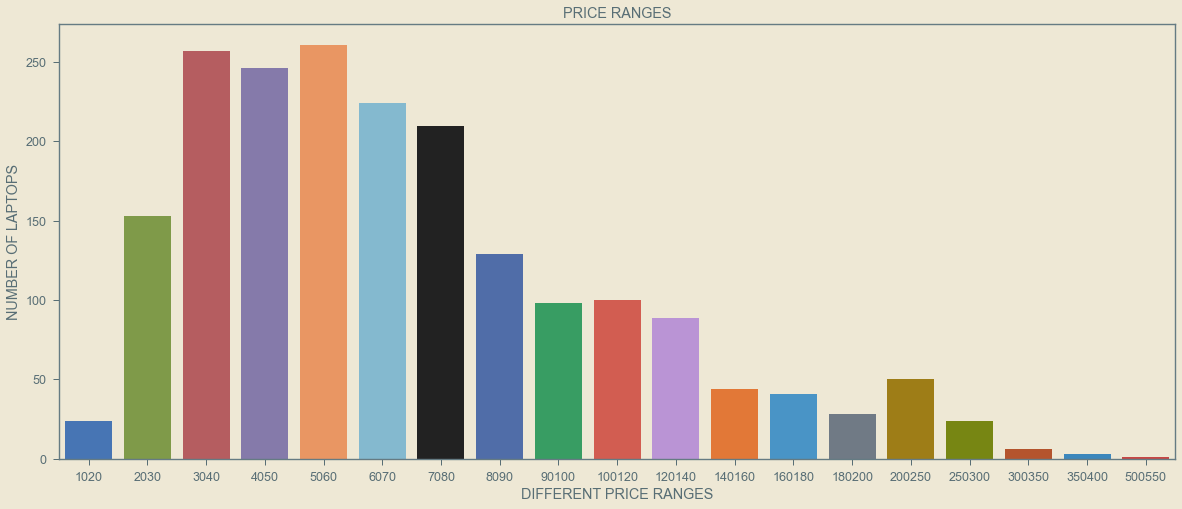

In [64]:
plt.figure(figsize=(20,8))
sns.barplot(x = df['lvl'].value_counts().keys(),y = df['lvl'].value_counts().values)
plt.title('PRICE RANGES')
plt.xlabel('DIFFERENT PRICE RANGES')
plt.ylabel('NUMBER OF LAPTOPS')

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'size RANGES')

Text(0.5, 0, "DIFFERENT size's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

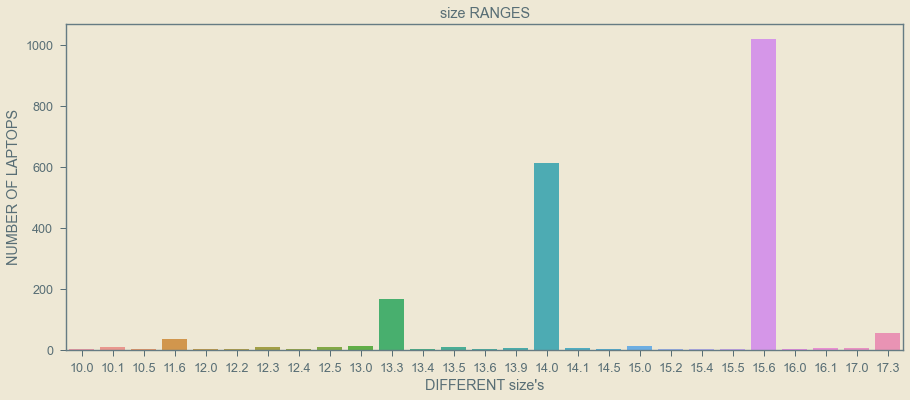

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'os RANGES')

Text(0.5, 0, "DIFFERENT os's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

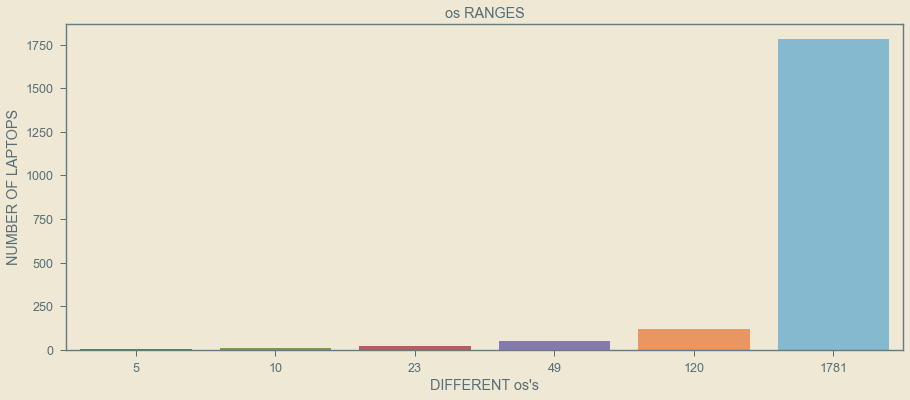

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'ram RANGES')

Text(0.5, 0, "DIFFERENT ram's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

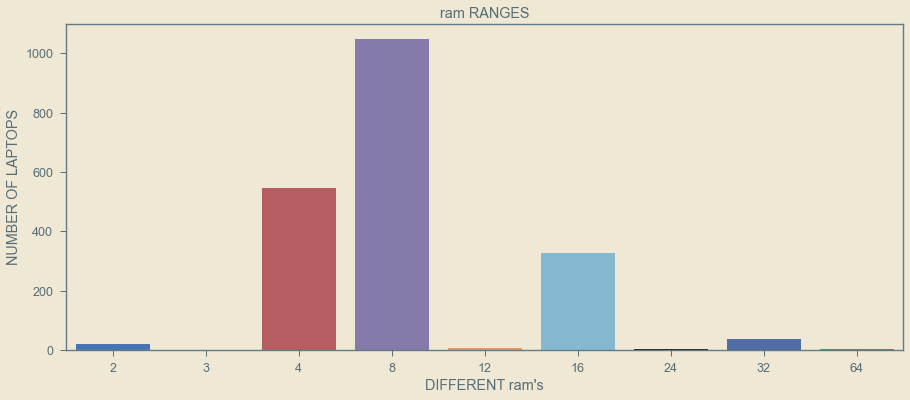

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'gprm RANGES')

Text(0.5, 0, "DIFFERENT gprm's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

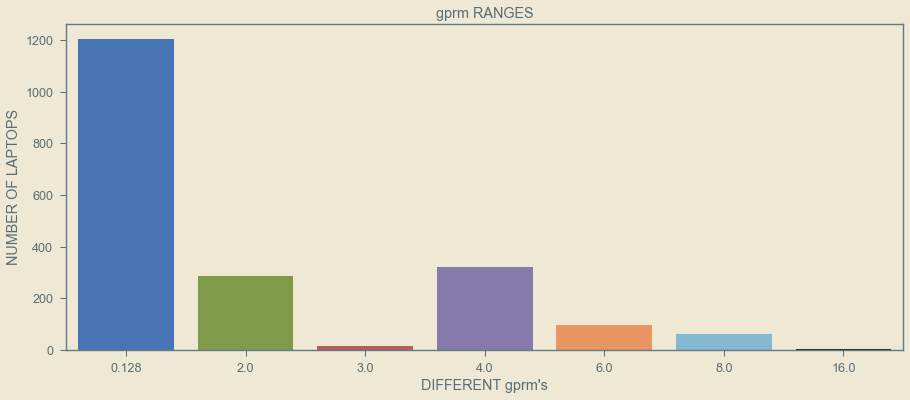

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'fp RANGES')

Text(0.5, 0, "DIFFERENT fp's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

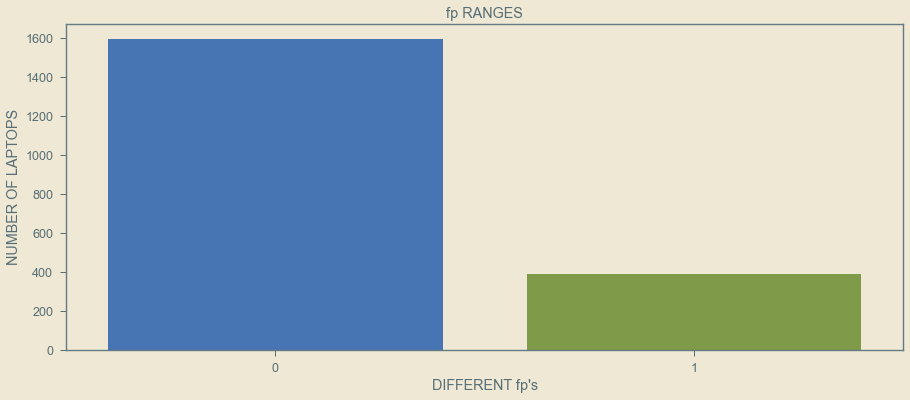

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Touch_or_not RANGES')

Text(0.5, 0, "DIFFERENT Touch_or_not's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

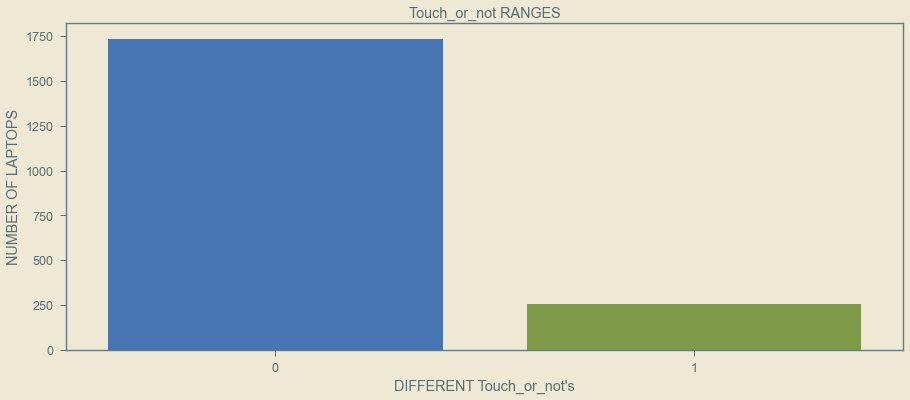

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'wid RANGES')

Text(0.5, 0, "DIFFERENT wid's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

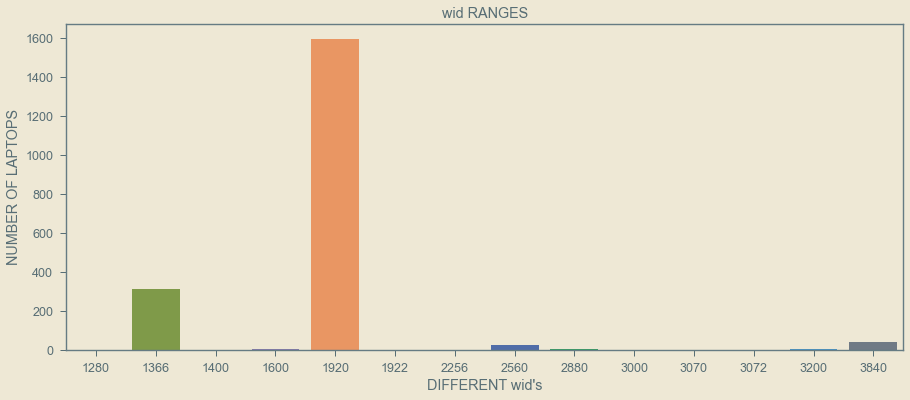

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'hgt RANGES')

Text(0.5, 0, "DIFFERENT hgt's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

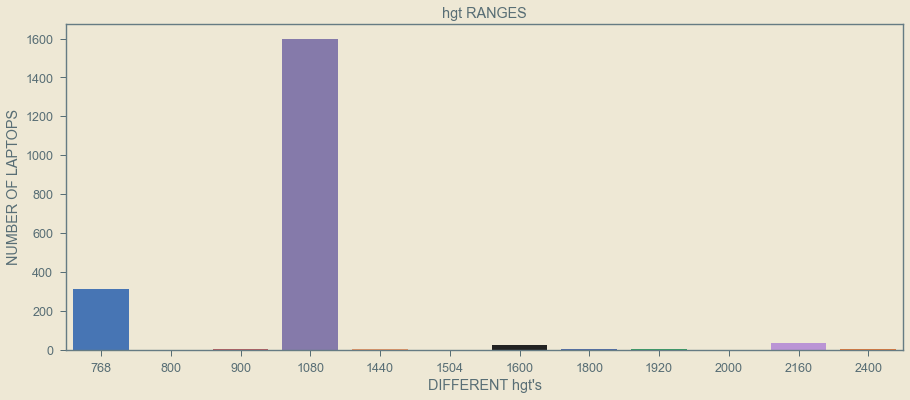

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'usb2 RANGES')

Text(0.5, 0, "DIFFERENT usb2's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

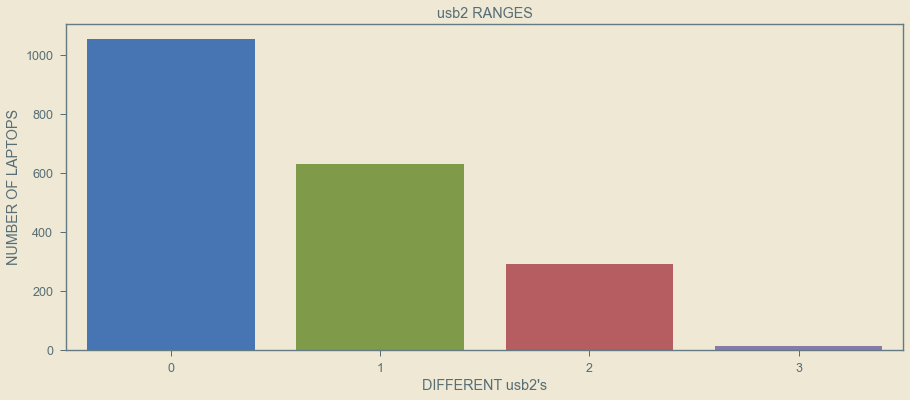

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'usb3 RANGES')

Text(0.5, 0, "DIFFERENT usb3's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

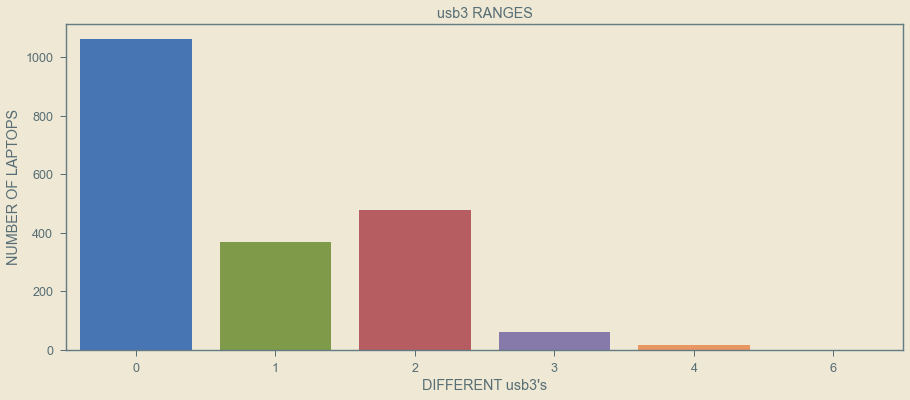

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'usbc RANGES')

Text(0.5, 0, "DIFFERENT usbc's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

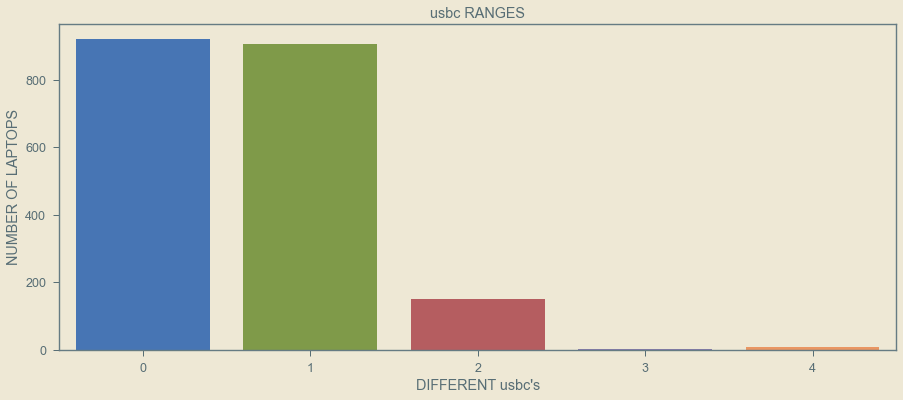

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'ethr RANGES')

Text(0.5, 0, "DIFFERENT ethr's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

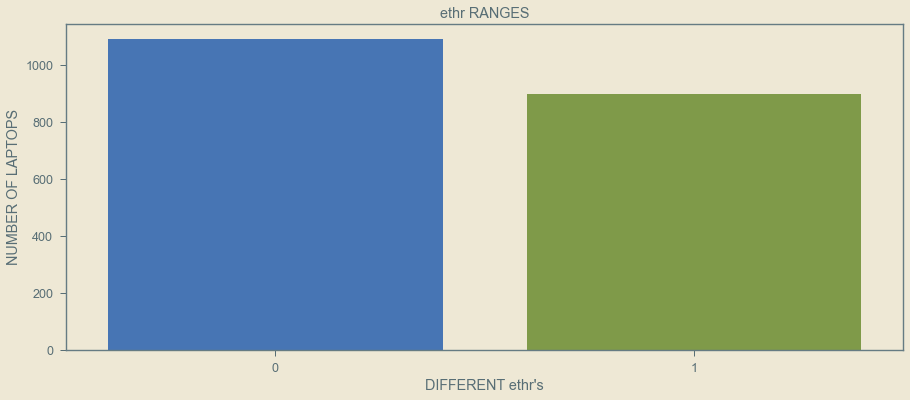

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'blth RANGES')

Text(0.5, 0, "DIFFERENT blth's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

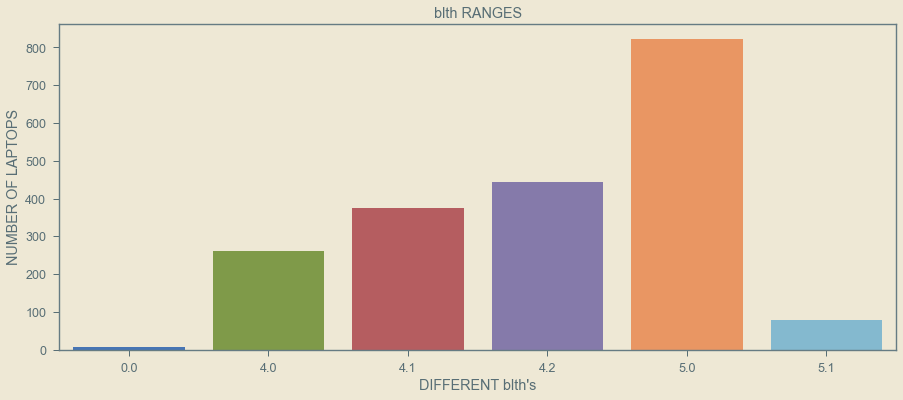

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'strtype RANGES')

Text(0.5, 0, "DIFFERENT strtype's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

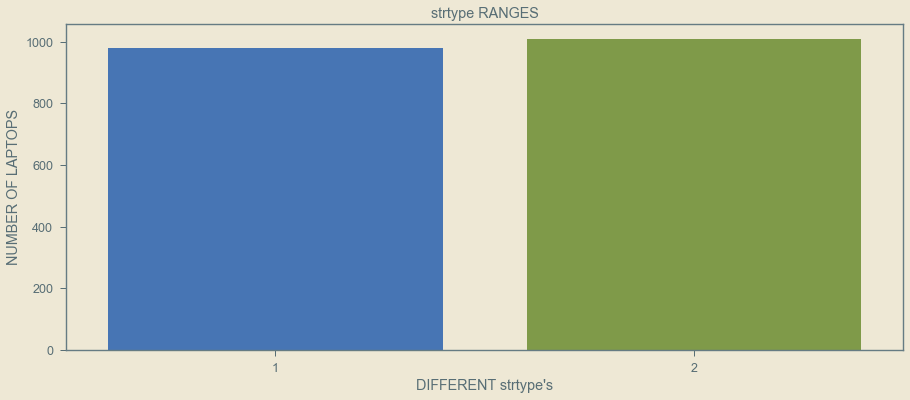

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'amst RANGES')

Text(0.5, 0, "DIFFERENT amst's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

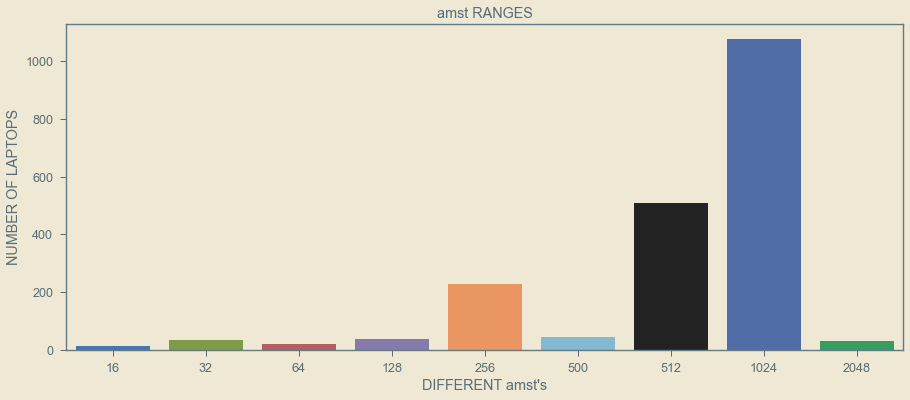

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'ncrs RANGES')

Text(0.5, 0, "DIFFERENT ncrs's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

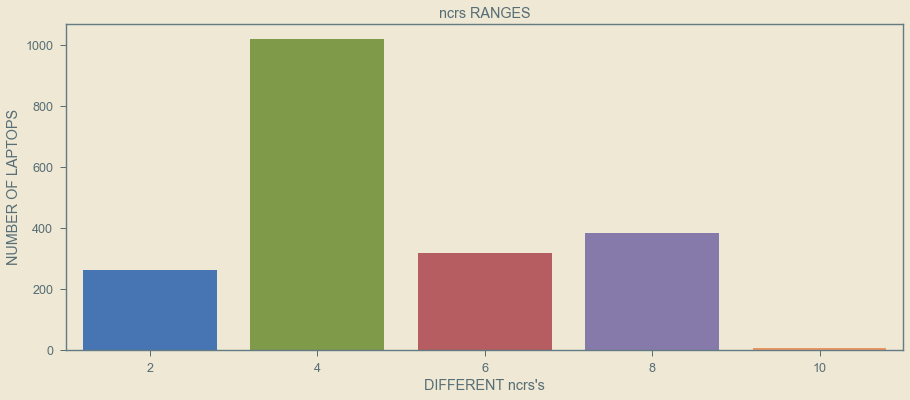

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'thrds RANGES')

Text(0.5, 0, "DIFFERENT thrds's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

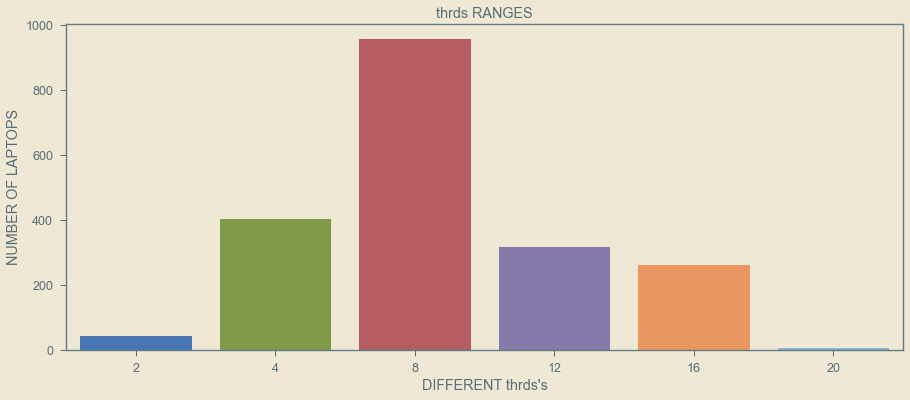

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'bc RANGES')

Text(0.5, 0, "DIFFERENT bc's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

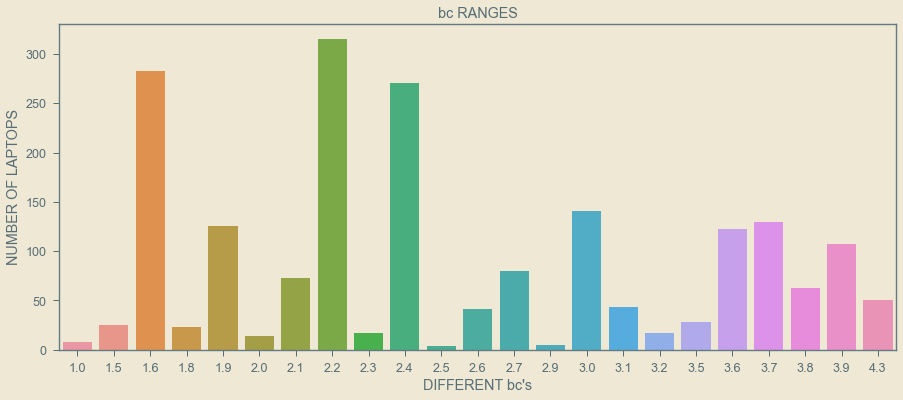

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'mcl RANGES')

Text(0.5, 0, "DIFFERENT mcl's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

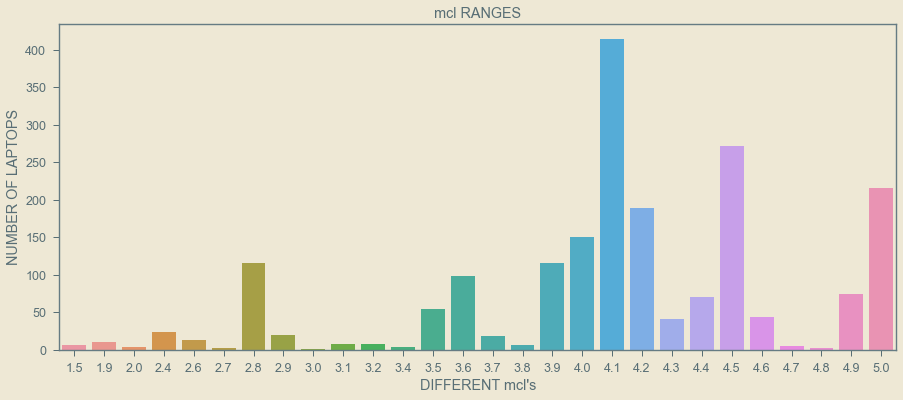

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'pnm RANGES')

Text(0.5, 0, "DIFFERENT pnm's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

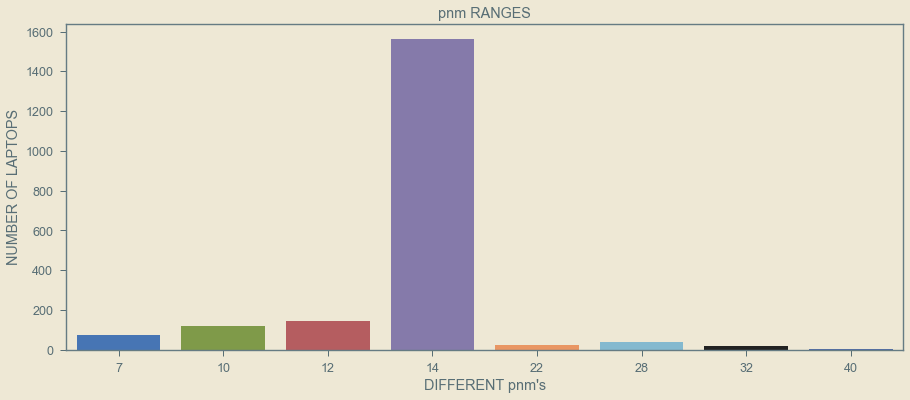

In [79]:
for i in X.columns:
    plt.figure(figsize=(15,6))
    sns.barplot(x = df[i].value_counts().keys(),y = df[i].value_counts().values)
    plt.title(f'{i} RANGES')
    plt.xlabel(f"DIFFERENT {i}'s")
    plt.ylabel('NUMBER OF LAPTOPS')
    plt.show()

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'os RANGES')

Text(0.5, 0, "DIFFERENT os's")

Text(0, 0.5, 'NUMBER OF LAPTOPS')

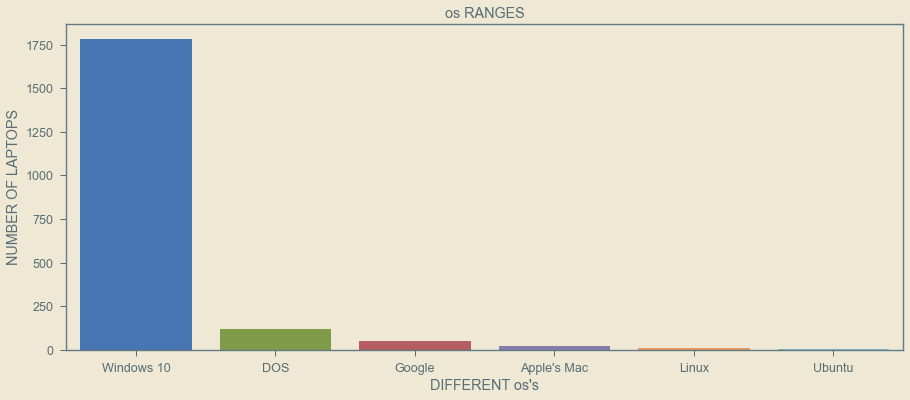

In [82]:
osls = ['Windows 10','DOS','Google',"Apple's Mac",'Linux','Ubuntu']
i = 'os'
plt.figure(figsize=(15,6))
sns.barplot(x = osls,y = df[i].value_counts().values)
plt.title(f'{i} RANGES')
plt.xlabel(f"DIFFERENT {i}'s")
plt.ylabel('NUMBER OF LAPTOPS')
plt.show()

In [7]:
df[['amst','strtype']].sample(20)

,amst,strtype
1882,1024,1
645,256,2
1236,512,2
1422,512,2
362,64,2
1330,512,2
1260,32,2
949,1024,1
659,1024,1
778,1024,1


In [11]:
for i in df.columns:
    df[i].value_counts()

59990     26
74990     25
69990     17
54990     16
64990     16
          ..
52499      1
111890     1
66833      1
86479      1
55300      1
Name: price, Length: 1218, dtype: int64

15.6    1019
14.0     613
13.3     168
17.3      54
11.6      34
15.0      13
13.0      11
13.5      10
12.3      10
10.1       9
12.5       9
16.1       6
13.9       5
17.0       5
14.1       5
12.0       2
16.0       2
13.4       2
12.2       2
15.4       2
15.2       1
13.6       1
10.0       1
15.5       1
14.5       1
10.5       1
12.4       1
Name: size, dtype: int64

1781    1781
120      120
49        49
23        23
10        10
5          5
Name: os, dtype: int64

8     1048
4      546
16     325
32      38
2       21
12       5
64       2
24       2
3        1
Name: ram, dtype: int64

0.128     1204
4.000      321
2.000      287
6.000       97
8.000       63
3.000       14
16.000       2
Name: gprm, dtype: int64

0    1596
1     392
Name: fp, dtype: int64

0    1734
1     254
Name: Touch_or_not, dtype: int64

1920    1596
1366     314
3840      38
2560      27
1600       2
3200       2
2880       2
1922       1
1400       1
1280       1
3072       1
3070       1
3000       1
2256       1
Name: wid, dtype: int64

1080    1597
768      314
2160      35
1600      24
1800       4
1440       3
900        3
2400       3
1920       2
2000       1
1504       1
800        1
Name: hgt, dtype: int64

5060      261
3040      257
4050      246
6070      224
7080      210
2030      153
8090      129
100120    100
90100      98
120140     89
200250     50
140160     44
160180     41
180200     28
250300     24
1020       24
300350      6
350400      3
500550      1
Name: lvl, dtype: int64

0    1053
1     630
2     291
3      14
Name: usb2, dtype: int64

0    1062
2     478
1     370
3      62
4      15
6       1
Name: usb3, dtype: int64

0    921
1    906
2    150
4      8
3      3
Name: usbc, dtype: int64

0    1091
1     897
Name: ethr, dtype: int64

5.0    822
4.2    443
4.1    376
4.0    261
5.1     78
0.0      8
Name: blth, dtype: int64

1    1984
0       4
Name: modm, dtype: int64

2    1008
1     980
Name: strtype, dtype: int64

1024    1076
512      508
256      228
500       43
128       37
32        33
2048      31
64        19
16        13
Name: amst, dtype: int64

4     1020
8      382
6      317
2      262
10       7
Name: ncrs, dtype: int64

8     956
4     404
12    317
16    260
2      44
20      7
Name: thrds, dtype: int64

2.2    315
1.6    283
2.4    271
3.0    141
3.7    130
1.9    126
3.6    123
3.9    107
2.7     80
2.1     73
3.8     63
4.3     51
3.1     43
2.6     41
3.5     28
1.5     25
1.8     23
3.2     17
2.3     17
2.0     14
1.0      8
2.9      5
2.5      4
Name: bc, dtype: int64

4.1    414
4.5    271
5.0    215
4.2    189
4.0    150
2.8    116
3.9    116
3.6     99
4.9     74
4.4     70
3.5     55
4.6     44
4.3     41
2.4     24
2.9     20
3.7     19
2.6     13
1.9     10
3.1      8
3.2      8
1.5      7
3.8      6
4.7      5
2.0      4
3.4      4
2.7      3
4.8      2
3.0      1
Name: mcl, dtype: int64

14    1562
12     146
10     118
7       76
28      41
22      22
32      21
40       2
Name: pnm, dtype: int64

In [12]:
len(df['lvl'].value_counts().keys())

19

In [15]:
df['modm']

0       1
1       1
2       1
3       1
4       1
       ..
1983    1
1984    1
1985    1
1986    1
1987    1
Name: modm, Length: 1988, dtype: int64

In [16]:
df.isna().sum()

price           0
size            0
os              0
ram             0
gprm            0
fp              0
Touch_or_not    0
wid             0
hgt             0
lvl             0
usb2            0
usb3            0
usbc            0
ethr            0
blth            0
modm            0
strtype         0
amst            0
ncrs            0
thrds           0
bc              0
mcl             0
pnm             0
dtype: int64

In [17]:
df.columns

Index(['price', 'size', 'os', 'ram', 'gprm', 'fp', 'Touch_or_not', 'wid',
       'hgt', 'lvl', 'usb2', 'usb3', 'usbc', 'ethr', 'blth', 'modm', 'strtype',
       'amst', 'ncrs', 'thrds', 'bc', 'mcl', 'pnm'],
      dtype='object')

In [71]:
X = df.drop(columns=['lvl','price','modm'])

In [93]:
#y1 = df['price']
y2 = df['lvl'].astype(str)

In [20]:
X

,size,os,ram,gprm,fp,Touch_or_not,wid,hgt,usb2,usb3,usbc,ethr,blth,strtype,amst,ncrs,thrds,bc,mcl,pnm
0,15.6,1781,4,0.128,0,0,1920,1080,0,0,1,1,4.1,1,1024,4,8,3.0,4.0,14
1,15.6,1781,4,0.128,1,0,1920,1080,2,0,1,0,4.1,1,1024,4,8,3.0,4.0,14
2,15.6,1781,8,0.128,0,0,1920,1080,1,3,0,0,4.0,1,1024,4,8,2.4,4.5,14
3,15.6,1781,8,0.128,0,0,1920,1080,0,0,1,0,5.0,1,1024,6,12,3.9,4.9,14
4,14.0,1781,4,0.128,0,0,1920,1080,0,2,1,0,4.1,2,256,4,4,2.1,3.9,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,15.6,1781,8,4.000,0,0,1920,1080,2,1,0,1,4.0,1,1024,2,4,2.7,3.1,14
1984,13.3,1781,16,0.128,1,1,1920,1080,0,0,2,0,5.0,2,512,6,12,2.2,4.1,14
1985,14.0,1781,8,0.128,0,1,1920,1080,0,2,0,1,4.1,2,128,4,8,1.6,4.1,14
1986,15.6,1781,4,4.000,0,0,1920,1080,1,2,0,1,4.1,1,1024,8,16,3.2,3.7,14


In [89]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC,RandomOverSampler,SMOTE

In [22]:
y2.value_counts()

5060      261
3040      257
4050      246
6070      224
7080      210
2030      153
8090      129
100120    100
90100      98
120140     89
200250     50
140160     44
160180     41
180200     28
1020       24
250300     24
300350      6
350400      3
500550      1
Name: lvl, dtype: int64

In [23]:
type(y2.iloc[23])

str

In [91]:
stgy = {'90100':100,'120140':100,'200250':100,
        '140160':50,'160180':50,'180200':40,
        '1020':40,'250300':40,
        '300350':40,'350400':40,'500550':40}
sm = RandomOverSampler(sampling_strategy=stgy)

In [94]:
X1,yy2 = sm.fit_resample(X,y2)

In [95]:
yy2.value_counts()

5060      261
3040      257
4050      246
6070      224
7080      210
2030      153
8090      129
120140    100
100120    100
200250    100
90100     100
160180     50
140160     50
500550     40
300350     40
180200     40
350400     40
250300     40
1020       40
Name: lvl, dtype: int64

In [96]:
xtr,xts,ytr,yts = train_test_split(X1,yy2,train_size=.7,random_state=123)

In [107]:
prmgrd = {
    'n_estimators':[800,850,900],
    'criterion':['gini','entropy'],
    'oob_score':[True],
    'n_jobs':[-1],
    'random_state':[123]
}

In [108]:
pgd = {
    'n_estimators':[300,350,400],
    'booster':['gbtree','gblinear','dart'],
    'random_state':[123]
}

In [109]:
gcv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=prmgrd,n_jobs=-1)

In [110]:
gxg = GridSearchCV(estimator=XGBClassifier(),param_grid=pgd,n_jobs=-1)

In [111]:
gcv.fit(xtr,ytr)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [800, 850, 900], 'n_jobs': [-1],
                         'oob_score': [True], 'random_state': [123]})

In [112]:
gxg.fit(xtr,ytr)

C:\Users\rvkmc\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [113]:
gcv.best_params_

{'criterion': 'gini',
 'n_estimators': 850,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 123}

In [114]:
gxg.best_params_

{'booster': 'dart', 'n_estimators': 350, 'random_state': 123}

In [36]:
gcv.score(xtr,ytr),gcv.score(xts,yts)

(0.9498069498069498, 0.44594594594594594)

In [37]:
gxg.score(xtr,ytr),gxg.score(xts,yts)

(0.9478764478764479, 0.44144144144144143)

In [97]:
stk = StratifiedKFold(n_splits=30,shuffle=True,random_state=123)

In [98]:
h = 0
for tri,tsi in stk.split(X1,yy2):
    rfc = RandomForestClassifier(warm_start=True,criterion='gini',n_estimators=400,n_jobs=-1,oob_score=True,random_state=123)
    xtrt,ytrt = X1.iloc[tri],yy2.iloc[tri]
    xtst,ytst = X1.iloc[tsi],yy2.iloc[tsi]
    rfc.fit(xtrt,ytrt)
    h+=1
    if h==1:
        mod = rfc
        a = rfc.score(xtrt,ytrt)
        b = rfc.score(xtst,ytst)
    if a<rfc.score(xtrt,ytrt) and b<rfc.score(xtst,ytst):
        mod = rfc
        a = rfc.score(xtrt,ytrt)
        b = rfc.score(xtst,ytst)
    if a<rfc.score(xtrt,ytrt) or b<rfc.score(xtst,ytst):
        modor = rfc
        aor = rfc.score(xtrt,ytrt)
        bor = rfc.score(xtst,ytst)
    if a<rfc.score(xtrt,ytrt):
        modtr = rfc
        atr = rfc.score(xtrt,ytrt)
        btr = rfc.score(xtst,ytst)
    if b<rfc.score(xtst,ytst):
        modts = rfc
        ats = rfc.score(xtrt,ytrt)
        bts = rfc.score(xtst,ytst)
print(a,b)
print(aor,bor)
print(atr,btr)
print(ats,bts)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=123, warm_start=True)

0.9445479962721341 0.44594594594594594
0.9408201304753029 0.5
0.945479962721342 0.3918918918918919
0.9408201304753029 0.5


In [99]:
mod.score(xtr,ytr),mod.score(xts,yts)
modor.score(xtr,ytr),modor.score(xts,yts)
modtr.score(xtr,ytr),modtr.score(xts,yts)
modts.score(xtr,ytr),modts.score(xts,yts)

(0.9298584298584298, 0.9234234234234234)

(0.9279279279279279, 0.9219219219219219)

(0.9292149292149292, 0.9219219219219219)

(0.9279279279279279, 0.9219219219219219)

In [102]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

In [103]:
def fncsc(pred,tr):
    print(f1_score(y_true=tr,y_pred=pred,average=None))
    print(accuracy_score(y_true=tr,y_pred=pred))
    print(precision_score(y_true=tr,y_pred=pred,average=None))
    print(recall_score(y_true=tr,y_pred=pred,average=None))

In [104]:
for i in [mod,modor,modtr,modts]:
    print("                              ")
    print("                              ")
    print("                              ")
    fncsc(i.predict(xts),yts)

                              
                              
                              
[0.94736842 1.         0.89230769 0.90909091 0.90322581 0.91666667
 0.97142857 0.96385542 1.         1.         0.93413174 1.
 0.90410959 1.         0.9005848  0.87022901 0.8976378  0.93617021
 0.92307692]
0.9234234234234234
[0.93103448 1.         0.90625    1.         0.82352941 1.
 0.94444444 0.95238095 1.         1.         0.90697674 1.
 0.92957746 1.         0.90588235 0.87692308 0.9047619  1.
 0.88235294]
[0.96428571 1.         0.87878788 0.83333333 1.         0.84615385
 1.         0.97560976 1.         1.         0.96296296 1.
 0.88       1.         0.89534884 0.86363636 0.890625   0.88
 0.96774194]
                              
                              
                              
[0.93103448 1.         0.875      0.95652174 0.875      0.91666667
 0.97142857 0.93975904 1.         1.         0.94047619 1.
 0.91156463 1.         0.9132948  0.85271318 0.90909091 0.8627451
 0.9523

In [105]:
def fre(i):
    return re.sub("[{}]",'',re.sub(':','=',re.sub("'","",str(i))))

In [106]:
for tri,tsi in stk.split(X1,yy2):
    rfc = XGBClassifier(fre(gxg.best_params_))
    xtrt,ytrt = X1.iloc[tri],yy2.iloc[tri]
    xtst,ytst = X1.iloc[tsi],yy2.iloc[tsi]
    rfc.fit(xtrt,ytrt)

NameError: name 'gxg' is not defined

In [46]:
rfc.score(xtr,ytr),rfc.score(xts,yts)

(0.9086229086229086, 0.8978978978978979)

In [115]:
h = 0
for tri,tsi in stk.split(X1,yy2):
    rfc = XGBClassifier(n_estimators=350,n_jobs=-1,random_state=123)
    xtrt,ytrt = X1.iloc[tri],yy2.iloc[tri]
    xtst,ytst = X1.iloc[tsi],yy2.iloc[tsi]
    rfc.fit(xtrt,ytrt)
    h+=1
    if h==1:
        mod = rfc
        a = rfc.score(xtrt,ytrt)
        b = rfc.score(xtst,ytst)
    if a<rfc.score(xtrt,ytrt) and b<rfc.score(xtst,ytst):
        mod = rfc
        a = rfc.score(xtrt,ytrt)
        b = rfc.score(xtst,ytst)
    if a<rfc.score(xtrt,ytrt) or b<rfc.score(xtst,ytst):
        modor = rfc
        aor = rfc.score(xtrt,ytrt)
        bor = rfc.score(xtst,ytst)
    if a<rfc.score(xtrt,ytrt):
        modtr = rfc
        atr = rfc.score(xtrt,ytrt)
        btr = rfc.score(xtst,ytst)
    if b<rfc.score(xtst,ytst):
        modts = rfc
        ats = rfc.score(xtrt,ytrt)
        bts = rfc.score(xtst,ytst)
print(a,b)
print(aor,bor)
print(atr,btr)
print(ats,bts)

C:\Users\rvkmc\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:20:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:20:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:20:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:20:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:21:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:21:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:21:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:21:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:21:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:21:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:22:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:22:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:22:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:22:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:22:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:22:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:22:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:22:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:23:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:23:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

[20:23:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, oob_score, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:23:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', oob_score=True, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

0.9436160298229264 0.4594594594594595
0.9398881640260951 0.5540540540540541
0.9445479962721341 0.43243243243243246
0.9398881640260951 0.5540540540540541


In [116]:
modxg.score(xtr,ytr),modxg.score(xts,yts)
modorxg.score(xtr,ytr),modorxg.score(xts,yts)
modtrxg.score(xtr,ytr),modtrxg.score(xts,yts)
modtsxg.score(xtr,ytr),modtsxg.score(xts,yts)

(0.9298584298584298, 0.9219219219219219)

(0.925997425997426, 0.9294294294294294)

(0.9272844272844273, 0.9279279279279279)

(0.925997425997426, 0.9294294294294294)

In [117]:
for i in [mod,modor,modtr,modts]:
    print("                              ")
    print("                              ")
    print("                              ")
    fncsc(i.predict(xts),yts)

                              
                              
                              
[0.85714286 1.         0.875      0.81818182 0.90322581 0.91666667
 0.95774648 0.96296296 0.95652174 0.96969697 0.93491124 1.
 0.92413793 1.         0.91860465 0.87878788 0.8976378  0.93617021
 0.95238095]
0.9219219219219219
[0.85714286 1.         0.90322581 0.9        0.82352941 1.
 0.91891892 0.975      0.91666667 0.94117647 0.89772727 1.
 0.95714286 1.         0.91860465 0.87878788 0.9047619  1.
 0.9375    ]
[0.85714286 1.         0.84848485 0.75       1.         0.84615385
 1.         0.95121951 1.         1.         0.97530864 1.
 0.89333333 1.         0.91860465 0.87878788 0.890625   0.88
 0.96774194]
                              
                              
                              
[0.94736842 1.         0.93939394 0.95652174 0.93333333 0.91666667
 0.97142857 0.97560976 1.         1.         0.94610778 1.
 0.91891892 1.         0.89655172 0.8372093  0.91935484 0.89795918
 0.952

In [84]:
import pickle as pkl

In [52]:
flnm = 'mod.pkl'
pkl.dump(mod,open(flnm,'wb'))

In [86]:
flnm = 'mod.pkl'
dgss = pkl.load(open(flnm,'rb'))

In [87]:
np.array(xtr.iloc[1,:])

NameError: name 'xtr' is not defined

In [55]:
dgss.predict([np.array(xtr.iloc[1,:])])

array(['300350'], dtype=object)

In [105]:
ytr.iloc[1]

'300350'

In [66]:
int_feat = [np.array(xtr.iloc[1,:])]
mod = pkl.load(open("mod.pkl",'rb'))
pd.DataFrame(data=np.array(int_feat).reshape(1,20),columns=X.columns)

,size,os,ram,gprm,fp,Touch_or_not,wid,hgt,usb2,usb3,usbc,ethr,blth,strtype,amst,ncrs,thrds,bc,mcl,pnm
0,15.6,1781.0,32.0,16.0,0.0,0.0,3840.0,2160.0,2.0,0.0,1.0,0.0,5.0,2.0,1024.0,6.0,12.0,2.7,4.4,14.0


In [68]:
for i in X.columns:
    i

'size'

'os'

'ram'

'gprm'

'fp'

'Touch_or_not'

'wid'

'hgt'

'usb2'

'usb3'

'usbc'

'ethr'

'blth'

'strtype'

'amst'

'ncrs'

'thrds'

'bc'

'mcl'

'pnm'

In [65]:
X.shape

(1988, 20)